### This notebook loads data from "Get_clustered_seq.ipynb" and performs replay analysis. the output of this script will be used by "Replay_vis"

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from scipy.ndimage import gaussian_filter1d
from scipy.special import factorial
from scipy.stats import spearmanr
import pftools as pf
import configparser
import os
import matplotlib as mpl
# Initialize the configuration parser
config = configparser.ConfigParser()

# Read the configuration file
config.read('config.ini')

# Get the data folder path from the config file
savefolder= config['paths']['savefolder']
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16  # You can adjust the font size as needed
plt.rcParams['ytick.labelsize'] = 16  # You can adjust the font size as needed
import mtools as mot
import pickle
from scipy.stats import mode
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

In [54]:

plt.rcParams['svg.fonttype'] = 'none'  # Export text as SVG <text> objects, not paths

mpl.rcParams['xtick.major.size'] = 6    # Length of major ticks on x-axis
mpl.rcParams['xtick.major.width'] = 1.5 # Width of major ticks on x-axis
mpl.rcParams['xtick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['xtick.major.pad'] = 10    # Padding between ticks and x-axis labels

mpl.rcParams['ytick.major.size'] = 6    # Length of major ticks on y-axis
mpl.rcParams['ytick.major.width'] = 1.5 # Width of major ticks on y-axis
mpl.rcParams['ytick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['ytick.major.pad'] = 10    # Padding between ticks and y-axis labels


# Set default spine and tick settings globally for all plots
mpl.rcParams['axes.linewidth'] = 1.5     # Set the width of all spines (top, bottom, left, right)
mpl.rcParams['xtick.major.width'] = 1.5  # Width of major ticks on x-axis
mpl.rcParams['ytick.major.width'] = 1.5  # Width of major ticks on y-axis
mpl.rcParams['xtick.labelsize'] = 12     # Font size of x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 12     # Font size of y-axis tick labels

# Define the helper function to hide spines
def hide_spines(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [55]:

def compute_allinfo(all_rates,P_x,r0,num_neurons):
    all_I_f = np.zeros(num_neurons)  # Forward I

    for nid in range(num_neurons):
  
        all_I_f[nid] = pf.computeSpatialInfo(all_rates[nid, :], P_x, r0[nid])
    return(all_I_f)

In [56]:
phase='learned'
chosen_cell_type='all'


In [57]:
# In this code i load the data from outward runs and find the cells which are place cells.
#burst_len='200ms'
fol='478'
#dir_of_run='L'
#celltype='PC'
celltype='Alltest_neworder'
fs = 20# sampling freq
burst_length=0.5
burst_len=str(burst_length)+'s'
burstsize=burst_length*fs# sample numbers of a burst

In [58]:
#filename = fol+'outward_'+dir_of_run+'_'+phase+'_correct_No_chunk_'+burst_len+'_transients_'+celltype+'_with_templates'
filename = fol+'sampling_L sampling_R outward_L outward_R reward_L reward_R_'+phase+'_correct_No_chunk_'+burst_len+'_transients_'+celltype+'_with_templates'# load all at once reward outward sampling

#filename_reward = fol+'reward_'+dir_of_run+'_'+phase+'_correct_No_chunk_'+burst_len+'_transients_'+celltype+'_with_templates'
#filename_sampling = fol+'sampling_'+dir_of_run+'_'+phase+'_correct_No_chunk_'+burst_len+'_transients_'+celltype+'_with_templates'

#filename = '478outward_R_all_correct_all_days_randomized_bursts_200ms_transients_allnew'

data = np.load(join(savefolder, filename), allow_pickle=True)
#data_reward = np.load(join(savefolder, filename_reward), allow_pickle=True)
#data_sampling = np.load(join(savefolder, filename_sampling), allow_pickle=True)

bound = [0, data['lin_pos'].shape[0]] #if turn_type == 'left' else [sepidx, endind]  

target_cluids=np.unique(data['ids_clust'])

In [59]:
y, neuron_tspidx, burst_tidxs, burst_cluids, num_neurons, dt = pf.GetData(data, bound=bound)


In [60]:
conds=['sampling_L',
 'sampling_R',
 'outward_L',
 'outward_R',
 'reward_L',
 'reward_R',
 'inward_L',
 'inward_R']


cond_number = dict(zip(conds, np.arange(len(conds))))# make mask values for each task
cond_names=cond_number

In [61]:
# ## to get the merged data of sampling, outward and reward for burst replay analysis 
# cell_types='All'
# descriotor='No_chunk_0.5s_transients'
# for fol in ['478','481','483','485']:

#     #savefolder = 'C:/Users/hamed/Desktop/Hamed/Github/TP7/results/'
#     #savefolder ='C:/Users/hamed/Desktop/Hamed/BCN/sequence/results/'
#     #filename = '48520220215_gcamp6f485_task_learning.mat_all_sessions_all_days_transients'
#     #filename = fol+'outward_'+dir_of_run+'_all_correct_all_days_original_bursts_neworder'+burst_len+'_transients_'+celltype
#     #fol='481'
#     #phase='all'
#     filename = fol+'Sesseion_info_All AllNo_chunk_0.5s_transients'

#     #filename = '478outward_R_all_correct_all_days_randomized_bursts_200ms_transients_allnew'

#     data_all_tasks = np.load(join(savefolder, filename), allow_pickle=True)
#     sess_info= data_all_tasks['sess_info']
#     #Masks= data_all_tasks['Masks']# this mask does not include mask of correct trials of single cells


#     filename_mask = fol+'Mask_with_correct_cells'
#     Masks_ = np.load(join(savefolder, filename_mask), allow_pickle=True)# i added the correct masks for single cell data recently
#     Masks=Masks_[0]


#     #data_info=np.load(savefolder+fol+'data_all_sessions'+cell_types+'_'+ descriotor+'newodrer', allow_pickle=True)
#     session_mask=Masks_[1]







#     speed_thr=0
#     # add the mask for speed. speed threshold is set to 5.
#     smooth_speed=mot.smooth_signal(sess_info['speed'], 13)# moving average over .5  second
#     Masks['speed_seq']=np.asarray(smooth_speed)[sess_info['id_peaks']]>speed_thr
#     Masks['speed']=smooth_speed>speed_thr


#     # select the data you need. Sessen number, epeoch, .... Selected data will be saved with corresposing name. Inward and outward data will be used by place filed code. 
#     sessin_numbers=np.arange(len(session_mask))#[4,5,6,7][0,1,2,3]##np.arange(len(session_mask))
#     #sessin_numbers=[6]
#     #sessin_numbers=[0,1,2,3,4,5,6,7] # soecify which session you want to work with
#     #celid=23# number of sample cell to show in the plot

#     #cond_number=[3] # conditon name (outwards)
#     #cond_number=[8,9,10,11] # inwards
#     #cond_number=[0,1] # sampling
#     #cond_number=[6,7] # reward
#     for con_number in ([1,3,5],[0,2,4],[0,2,4,1,3,5]):
            
#         trial_type=1 # 1 is correct       0 is failed

#         if trial_type==1:
#             type_name='correct'
#         elif trial_type==0:
#             type_name='failed'



#         phase=None#None#None#,1 # 0 is learning,    1 is learned,  None is both
#         if phase==None:
#             phase_name='all'
#         elif phase==0:
#             phase_name='learning'
#         elif phase==1:
#             phase_name='learned'
                


#         # odd_even=1# even trials
#         # run_data_e=mot.apply_masks(sess_info,Masks,cond_number,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
#         # #plt.title(run_data_e['sess_name']+' (even) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')

#         # odd_even=0# odd trials
#         # run_data_o=mot.apply_masks(sess_info,Masks,cond_number,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)
#         # #plt.title(run_data_e['sess_name']+' (odd) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')

#         odd_even=None# all trials
#         run_data_all=mot.apply_masks_test(sess_info,Masks,con_number,cond_names,sessin_numbers,odd_even,session_mask,trial_type,phase)



#         name_of_conds=' '.join([xn for xn,x in cond_names.items() if x in con_number])

#         run_data_all['template']=sess_info['template']
#         # with open(savefolder+fol+animal_direction+'_'+ phase_name+'_'+type_name+'_'+descriotor+'_'+cell_types+'test_neworder_with_templates','wb') as f:
#         #     pickle.dump(dict(run_data_all), f)   
#         #plt.title(run_data_e['sess_name']+' (all) ('+ run_data_e['phase_name']+') ('+run_data_e['cond_name'] +')')
#         # with open(savefolder+fol+name_of_conds+'_'+ phase_name+'_'+type_name+'_'+descriotor+'_'+cell_types+'test_neworder_with_templates','wb') as f:
#         #     pickle.dump(dict(run_data_all), f) 

In [62]:
# Analysis parameters
exclude_peak_neighs=1
include_peak_neighs=0


dt = 1/fs  # bin size of each time index
dy = 0.001 # bin size for position histogram. Since we will smooth the histogram anyways, the smaller the better (approaching Kernel Density Estimation).
sigma_y = 0.05 # I do not know the size of the animal. So, assume it to be 1% of the track.
sigma_yidx = sigma_y/dy  # Convert the position unit to unit of array index.
yedges = np.arange(0-dy/2, 1+dy, dy)  # edges for histogram
y_ax = pf.MidAx(yedges)  # position axis, mainly for plotting. Since edges are just for histogram.

# Creating a mask array for excluding position bins at the burst events (with neighbouring number of index = 1)
expanded_all_burst_tidxs = pf.expand_neighbins(burst_tidxs, expand_neighs=exclude_peak_neighs)

y_tax = np.arange(y.shape[0])
y_tax_excluded = pf.exclude_idx(y_tax, expanded_all_burst_tidxs)
y_excluded = y[y_tax_excluded]


# Compute the occupancy, using only those admitted position points
occ, occ_gau = pf.GetOccupancy(y_excluded, yedges, dt, sigma_yidx)

In [63]:
def get_rate_all(data,neuron_tspidx,occ_gau,yedges,sigma_yidx,expanded_all_burst_tidxs,num_neurons,y_ax,y,shuffle_spikes=False):
    # This function uses the spike time to estimate the rate maps of all cells 
    # Compute the place fields
    counts_all = np.zeros((num_neurons, y_ax.shape[0])).astype(float) # for storing spike counts. Not used.
    p_all=  np.zeros(y_ax.shape[0]).astype(float)
    r_all = np.zeros((num_neurons, y_ax.shape[0])).astype(float)  # for storing firing rates


    for nid in range(num_neurons):
        tspidx = neuron_tspidx[nid]

        
        # Exclude spike times occuring in the neighours(=1) of the burst events.
        masked_tspidx = pf.exclude_idx(tspidx, expanded_all_burst_tidxs)
        
        if shuffle_spikes:# shuffle spike times for getting random place fields

            masked_tspidx,spk=pf.spike_shuffle(data,masked_tspidx,None)


        # Get "spike positions"
        neuron_ysp = y[masked_tspidx]
        
        # Compute smoothed firing rate map
        rate, counts_ysp_gau,P_x = pf.GetRate(neuron_ysp, occ_gau, yedges, sigma_yidx)

        #print(len(masked_tspidx),len(masked_tspidx_sh))
        
        # Store all of them
        r_all[nid, :] = rate
        counts_all[nid, :] = counts_ysp_gau  
        p_all=P_x
    return r_all,counts_all,p_all

In [64]:
r_all,counts_all,p_all=get_rate_all(data,neuron_tspidx,occ_gau,yedges,sigma_yidx,expanded_all_burst_tidxs,num_neurons,y_ax,y,shuffle_spikes=False)

In [65]:
r_all_outward={}

outward_l_single_cell=[]
for inrn in range(len(neuron_tspidx)):

    outward_l_single_cell.append(neuron_tspidx[inrn][(data['mask_cond_fr_cells'][inrn]==2)])

outward_r_single_cell=[]
for inrn in range(len(neuron_tspidx)):

    outward_r_single_cell.append(neuron_tspidx[inrn][(data['mask_cond_fr_cells'][inrn]==3)])


r_all_outward_left,counts_all_outward_left,p_all_outward_left= get_rate_all(data,outward_l_single_cell,occ_gau,yedges,sigma_yidx,expanded_all_burst_tidxs,num_neurons,y_ax,y)
r_all_outward_right,counts_all_outward_right,p_all_outward_right= get_rate_all(data,outward_r_single_cell,occ_gau,yedges,sigma_yidx,expanded_all_burst_tidxs,num_neurons,y_ax,y)

r_all_outward['left']=r_all_outward_left

r_all_outward['right']=r_all_outward_right

In [66]:
trajtidx = np.arange(y.shape[0])
# all_L_norm = np.zeros((y_ax.shape[0], trajtidx.shape[0]))


# # Loop through all time indexes to decode the positions.
# # Looping each time index is not so efficient. Vectorization is recommended if you do not need to include the neighbouring bins for decoding.
# for trajtidx_each in trajtidx:
#     #print('\r%d/%d'%(trajtidx_each, trajtidx.shape[0]), end="", flush=True)
    
#     # Decode each time index. 
#     _, L_norm = pf.decode_neighbins(trajtidx_each, y_ax, r_all, neuron_tspidx, dt=dt, num_neigh=include_peak_neighs)
#     all_L_norm[:, trajtidx_each] = L_norm

In [67]:
Cell_types=np.load( savefolder+'_Cell_types',allow_pickle=True)
Cluster_types=np.load( savefolder+'_Cluster_types',allow_pickle=True)

TC_clusters=np.concatenate((Cluster_types[phase][fol]['TC_arm'],Cluster_types[phase][fol]['TC_stem']))
PC_clusters=np.concatenate((Cluster_types[phase][fol]['PC_arm'],Cluster_types[phase][fol]['PC_stem']))


In [68]:
Cell_type_idx={}
mask_cell_type=np.zeros(len(neuron_tspidx),dtype=bool)# cells that are pc or tc are True

mask_cell_type[Cell_types[phase][fol]['TC_arm']]=True
mask_cell_type[Cell_types[phase][fol]['TC_stem']]=True
mask_cell_type[Cell_types[phase][fol]['PC_arm']]=True
mask_cell_type[Cell_types[phase][fol]['PC_stem']]=True

Cell_type_idx['TC_cells']=np.union1d(Cell_types[phase][fol]['TC_arm'],Cell_types[phase][fol]['TC_stem'])
Cell_type_idx['PC_cells']=np.union1d(Cell_types[phase][fol]['PC_arm'],Cell_types[phase][fol]['PC_stem'])

# neuron_tspidx_TC=np.asarray([x for ix, x in enumerate(neuron_tspidx) if ix in TC_cells])
# neuron_tspidx_PC=np.asarray([x for ix, x in enumerate(neuron_tspidx) if ix in PC_cells])


Cell_type_idx['Non_SI_cells']=np.where(~mask_cell_type)[0]

Cell_type_idx['All']=np.arange(len(neuron_tspidx))


In [69]:
for cltyp_name,cltyp, in Cell_type_idx.items():
    print(cltyp_name)

TC_cells
PC_cells
Non_SI_cells
All


In [70]:
all_cluster=np.unique(data['ids_clust'])

all_cluster_tc_removed = np.setdiff1d(all_cluster, TC_clusters)
SI_clusters = np.setdiff1d(all_cluster_tc_removed, PC_clusters)

cluster_types={}
cluster_types['TC_cluster']=TC_clusters
cluster_types['PC_cluster']=PC_clusters
cluster_types['Non_SI_cluster']=SI_clusters



In [71]:
Cell_type_idx_all=Cell_type_idx['All']


In [72]:

Nshuffles = 500
# Cell type and condition names
#cell_types = ['TC_cells', 'PC_cells', 'Non_SI_cells','All']
cond_names = {
    'sampling_L': 0,
    'sampling_R': 1,
    'outward_L': 2,
    'outward_R': 3,
    'reward_L': 4,
    'reward_R': 5,
    'inward_L': 6,
    'inward_R': 7
}

In [73]:
    

def cound_spik_in_burst(burst_tidx,r_all,neuron_tspidx):
    num_neigh=0
    # Time bins, but for decoding
    dt_total = dt * (num_neigh * 2 + 1)  # the larger the time bins, the larger the "delta t" for computing the rate.
    tidx_min, tidx_max = burst_tidx - num_neigh, burst_tidx + num_neigh
    
    # Lengths/shapes
    num_neurons = r_all.shape[0]
    # spike counts:
    counts_all = np.zeros(num_neurons)
    for nid in range(num_neurons):
        counts_all[nid] = np.sum((neuron_tspidx[nid] >= tidx_min) & (neuron_tspidx[nid] <= tidx_max)) # both sides inclusive.
    return counts_all
 

In [74]:
# import numpy as np
# from scipy.ndimage import gaussian_filter1d
# from sklearn.linear_model import LinearRegression
# from scipy.stats import pearsonr
# import matplotlib.pyplot as plt

# # Input array (predicted animal positions)
# positions =y_ML

# # Step 1: Smooth the positions to reduce noise
# smoothed_positions = positions#gaussian_filter1d(positions, sigma=1)

# # Step 2: Calculate position differences
# position_diff = np.diff(smoothed_positions)

# # Step 3: Perform linear regression to fit a linear trajectory
# time = np.arange(len(smoothed_positions)).reshape(-1, 1)
# model = LinearRegression().fit(time, smoothed_positions)
# slope = model.coef_[0]

# # Step 4: Calculate correlation with a linear sequence
# linear_sequence = np.linspace(min(smoothed_positions), max(smoothed_positions), len(smoothed_positions))
# correlation, _ = pearsonr(smoothed_positions, linear_sequence)



# # Step 6: Shuffle test for statistical significance
# shuffled_correlations = []
# for _ in range(1000):
#     shuffled_positions = np.random.permutation(smoothed_positions)
#     shuffled_corr, _ = pearsonr(shuffled_positions, linear_sequence)
#     shuffled_correlations.append(shuffled_corr)

# # Calculate p-value
# p_value = np.mean(np.array(shuffled_correlations) >= correlation)

# # Print results
# print(f"Slope: {slope:.3f}")
# print(f"Correlation with linear sequence: {correlation:.3f}")
# print(f"P-value from shuffle test: {p_value:.4f}")
# # Step 5: Plot the positions and linear fit
# plt.figure(figsize=(10, 6))
# plt.plot(smoothed_positions, label="Smoothed Positions", marker="o")
# plt.plot(linear_sequence, label="Linear Sequence", linestyle="--")
# plt.title(f"Slope: {slope:.3f}, Correlation: {correlation:.3f} , P: {p_value:.3f}")
# plt.legend()
# plt.xlabel("Time")
# plt.ylabel("Position")
# plt.show()

In [75]:

plt.rcParams['svg.fonttype'] = 'none'  # Export text as SVG <text> objects, not paths

mpl.rcParams['xtick.major.size'] = 6    # Length of major ticks on x-axis
mpl.rcParams['xtick.major.width'] = 1.5 # Width of major ticks on x-axis
mpl.rcParams['xtick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['xtick.major.pad'] = 10    # Padding between ticks and x-axis labels

mpl.rcParams['ytick.major.size'] = 6    # Length of major ticks on y-axis
mpl.rcParams['ytick.major.width'] = 1.5 # Width of major ticks on y-axis
mpl.rcParams['ytick.direction'] = 'in' # Tick direction, both in and out
mpl.rcParams['ytick.major.pad'] = 10    # Padding between ticks and y-axis labels


# Set default spine and tick settings globally for all plots
mpl.rcParams['axes.linewidth'] = 1.5     # Set the width of all spines (top, bottom, left, right)
mpl.rcParams['xtick.major.width'] = 1.5  # Width of major ticks on x-axis
mpl.rcParams['ytick.major.width'] = 1.5  # Width of major ticks on y-axis
mpl.rcParams['xtick.labelsize'] = 12     # Font size of x-axis tick labels
mpl.rcParams['ytick.labelsize'] = 12     # Font size of y-axis tick labels

# Define the helper function to hide spines
def hide_spines(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [76]:
# # Initialize the result dictionary for left and right separately
# sig_ratios = {cell_type: {'left': {}, 'right': {}} for cell_type in cluster_types}
# # List of condition groups to filter
# #conditions_to_filter = ['reward',]
# # Dictionary to map sides to outward conditions
# cond_sides = {
#     'left': cond_names['outward_L'],
#     'right': cond_names['outward_R']
# }
# artifact_thr = .3
# # Loop through each cell type
# for cluster_type_name in cluster_types.keys():
#     # Loop through left and right conditions
#     for side, outward_cond in cond_sides.items():
#         # Loop through all behavioral conditions (sampling, reward, outward)
#         for condition,cond in cond_names.items():
#             # Get the left or right condition for the current behavioral state
#             cnd_name=condition
#             #cond = cond_names[cnd_name]
#             #print(str(outward_cond)+'       '+str(cond))
#             # Create the burst condition mask using all conditions
#             burst_cond_mask = (data['mask_cond_fr'] == cond)
#             burst_idx_cond = burst_tidxs[burst_cond_mask]
#             cluster_idx_cond = data['ids_clust'][burst_cond_mask]
#             cluster_type_mask = np.isin(cluster_idx_cond, cluster_types[cluster_type_name])
#             burst_cluster_type_cond = burst_idx_cond[cluster_type_mask]
#             #print(condition)
#             # Store in the dictionary
#             #sig_ratios[cluster_type_name][side][condition] = burst_cluster_type_cond

#             # Process outward_single_cell and r_all_type for each neuron using only outward condition
#             outward_single_cell = []
#             #r_all_type = []
#             #for inrn in range(len(neuron_tspidx)):
#                 # Only filter neurons based on the outward condition
#                 #outward_single_cell.append(neuron_tspidx[inrn][data['mask_cond_fr_cells'][inrn] == outward_cond])
#                # outward_single_cell.append(neuron_tspidx[inrn])

#                 #r_all_type.append(r_all[inrn])

#             # Optional: Store outward_single_cell and r_all_type if needed
#             # Convert r_all_type to a NumPy array
#             r_all_type = np.asarray(r_all_outward[side])

#             # Space-time correlation parameters
            
#             include_peak_neighs2 = 0
            
#             pvals_1n = []
#             pvals_1n_neg=[]
#             z_bursts=[]
#             Rmse=[]
#             # Loop through all burst events
#             for iburst_i, burst_i in enumerate(burst_cluster_type_cond):
#                 burst_tidx = burst_i
#                 frame_idxs = np.arange(burst_tidx - int(np.floor(burstsize / 2)), burst_tidx + int(np.ceil(burstsize / 2)))

#                 all_L_norm = np.zeros((y_ax.shape[0], frame_idxs.shape[0]))
#                 for i in range(len(frame_idxs)):
#                     spk_cnt=cound_spik_in_burst(frame_idxs[i],r_all_type,neuron_tspidx)
#                     if np.sum(spk_cnt)<1:
#                     #print('boz')
#                         continue
                        
#                     _, all_L_norm[:, i] = pf.decode_neighbins(frame_idxs[i], y_ax, r_all_type, neuron_tspidx, dt=dt, num_neigh=include_peak_neighs2)
#                 non_zero_columns = np.where(~(all_L_norm == 0).all(axis=0))[0]

#                 all_L_norm = all_L_norm[:, ~(all_L_norm == 0).all(axis=0)]
#                 if len (all_L_norm)==0:
#                     continue
#                 #print('shape:',np.shape(all_L_norm))
#                 y_real = y[frame_idxs[non_zero_columns]]

#                 if 'outward' in condition : # if burst is on the edge of maze
#                     # Identify the first point where the change exceeds the threshold

#                     # Find the differences between consecutive elements
#                     diff = np.abs(np.diff(y_real))
#                     sudden_change_index = np.where(diff > artifact_thr)[0]

#                     # Keep only points before the sudden change
#                     if len(sudden_change_index) > 0:
#                         y_real = y_real[:sudden_change_index[0] + 1]
#                         all_L_norm = all_L_norm[:, :sudden_change_index[0] + 1]


#                 if np.shape(all_L_norm)[1]<5:# exclude bursts hta have less than 5 active bins
#                     continue

#                 t_ax = np.arange(np.shape(all_L_norm)[1])
                
#                 yidx_max = np.nanargmax(all_L_norm, axis=0)

#                 # if np.max(frame_idxs) >= len(y):
#                 #     continue
                

                
#                 # if abs(np.sum(np.diff(y_real))) > artifact_thr:
#                 #     continue

#                 # if np.sum(yidx_max == bias_idx_cell_types[side]) > 0:
#                 #     continue

#                 y_ML = y_ax[yidx_max]
#                 # if np.sum(y_ML) == 0:
#                 #     continue
#                 rmse = np.sqrt(np.mean((y_real - y_ML) ** 2))
#                 Rmse.append(rmse)
#                 # Spearman correlation between predicted and real positions
#                 rho, _ = spearmanr(y_ML, t_ax)
#                 #rho, _ = pearsonr(y_ML, t_ax)
#                 #print(rho)
#                 # if np.isnan(rho):
#                 #     continue
                
#                 # Generate a null distribution of correlations
#                 null_rhos = np.zeros(Nshuffles)
#                 for shui in range(Nshuffles):
#                     ranvec = np.random.permutation(t_ax.shape[0])
#                     null_rhos[shui], _ = spearmanr(y_ML, t_ax[ranvec])
#                     #null_rhos[shui], _ = pearsonr(y_ML, t_ax[ranvec])

#                 z= (rho-np.mean(null_rhos))/np.std(null_rhos)
#                 z_bursts.append(z)
#                 # Calculate p-value
#                 pval = 1 - np.mean((rho) > (null_rhos))
#                 pval_neg = 1 - np.mean((rho) < (null_rhos))# include negative replays

#                 pvals_1n.append(pval)
#                 pvals_1n_neg.append(pval_neg)
#                 if 1:#((pval <.025) | (pval_neg < .025)) & ('outward' in condition):
#                     # Plotting the heatmap and positions
#                     fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#                     # Heatmap of decoded positions
#                     im = ax[0].pcolormesh(t_ax, y_ax, all_L_norm, cmap='hot', rasterized=True)
#                     ax[0].scatter(t_ax, y_ML, c='#00008B', marker='x', s=50, label='ML')
#                     ax[0].scatter(t_ax, y_real, c='g', marker='o', s=50, label='Real')
#                     cbar = plt.colorbar(im, ax=ax[0])
#                     cbar.ax.set_ylabel(r'P(spikes | position )')

#                     ax[0].set_xlabel('Time index at burst', fontsize=16)
#                     ax[0].set_ylabel('Position', fontsize=16)
#                     ax[0].set_yticks(np.arange(0, 1, 0.1))
#                     ax[0].set_yticks(np.arange(0, 1, 0.05), minor=True)
#                     ax[0].set_ylim([-.05,1.05])
#                     ax[0].legend(fontsize=12)

#                     # Histogram of null distribution
#                     ax[1].hist(null_rhos, bins=50, color='gray', alpha=0.7)
#                     ax[1].axvline(rho, color='red', linestyle='--', label=f'Observed rho = {rho:.2f}')
#                     ax[1].set_title(f'Null distribution  rmse={rmse:.5f} (p-val = {pval:.5f} or {pval_neg:.5f} )')
#                     ax[1].legend()

#                     plt.suptitle(f'{filename[:3]} {side} - {cluster_type_name} - {cnd_name}{phase}'+str(iburst_i), fontsize=18)
#                     hide_spines(ax=ax[0])
#                     fig.tight_layout()
#                     plt.savefig(savefolder+'Replay'+side+f'{filename[:3]}{cluster_type_name}{cnd_name}{phase} burstid={iburst_i}.svg')
#                     plt.show()

#             # Calculate significant burst ratio
#             #sig_ratio = np.sum(np.asarray(pvals_1n) < .05) / len(burst_cluster_type_cond)


#             sig_ratio = np.sum((np.asarray(pvals_1n) < .025) | (np.asarray(pvals_1n_neg) < .025)) / len(burst_cluster_type_cond)

            
#             significant_bursts = {
#                 'pvals_pos': pvals_1n,
#                 'pvals_neg':pvals_1n_neg,
#                 'sig_burst_ratio': sig_ratio,
#                 'name': f'{filename[:3]} - {cluster_type_name} - {cnd_name}',
#                 'Z':z_bursts,
#                 'rmse':Rmse
#             }

#             # Store the result in the dictionary
#             sig_ratios[cluster_type_name][side][condition] = significant_bursts
#             significant_bursts_name = 'Replay' + filename[:3] + phase


# # with open(savefolder+significant_bursts_name, 'wb') as file:
# #     pickle.dump(sig_ratios, file)

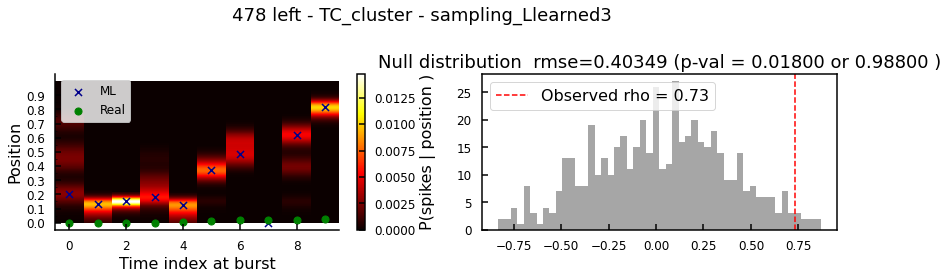

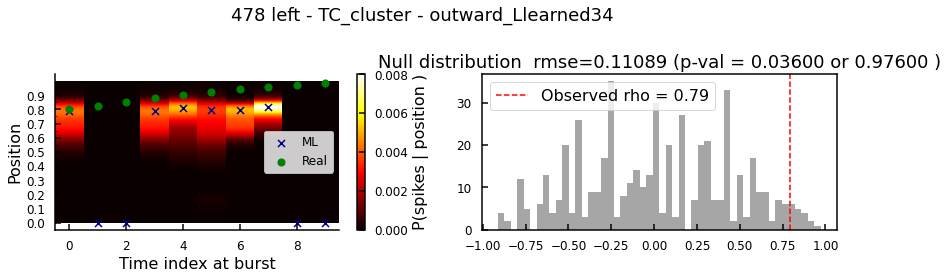

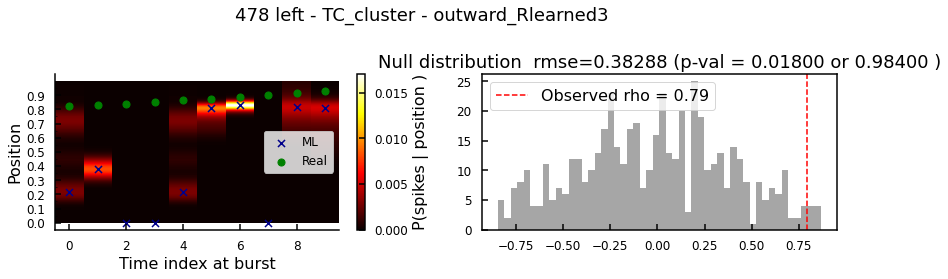

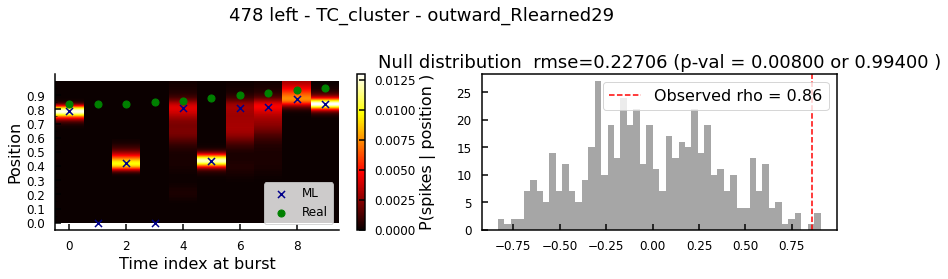

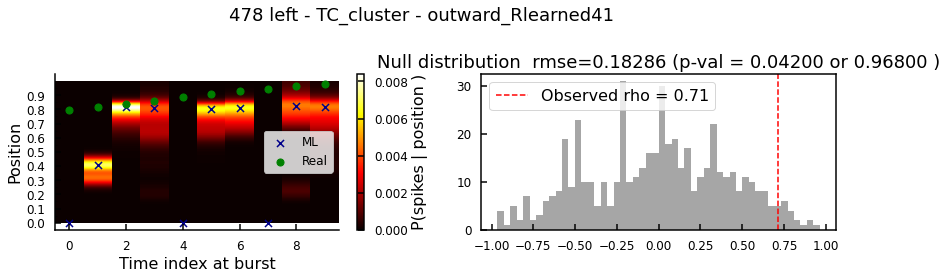

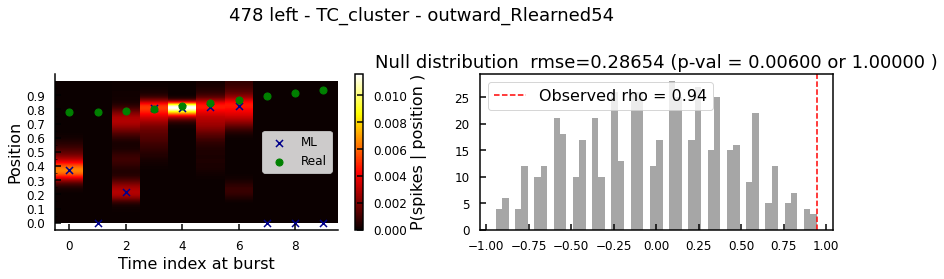

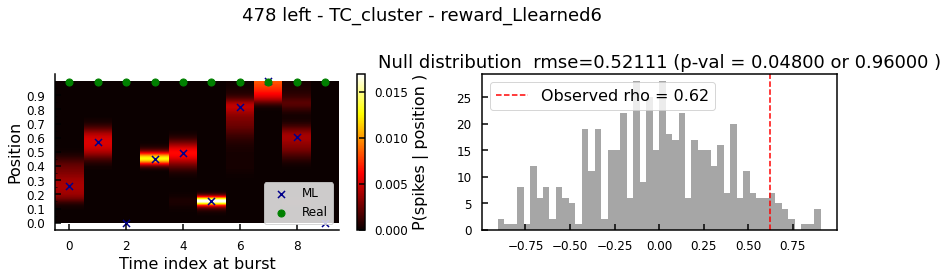

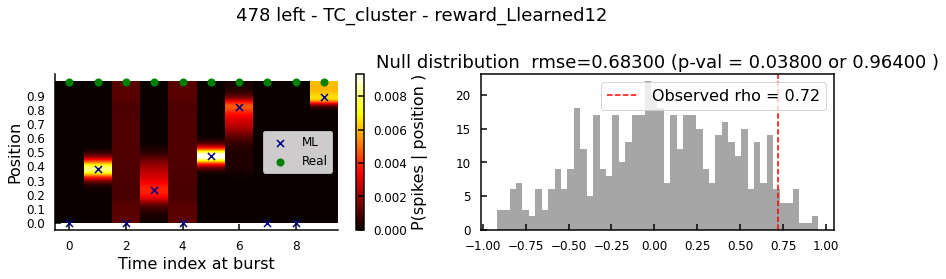

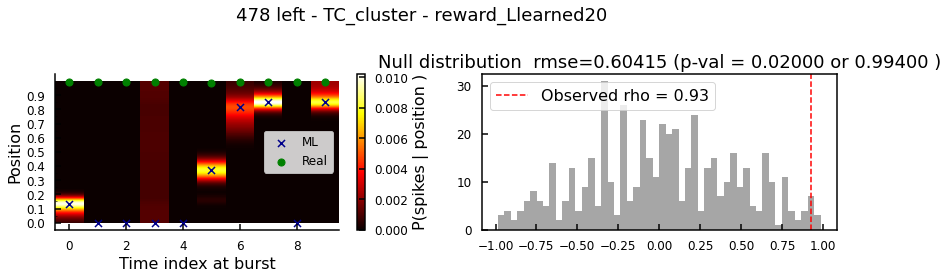

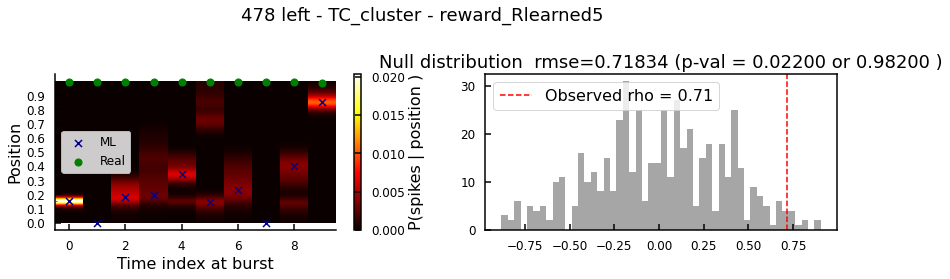

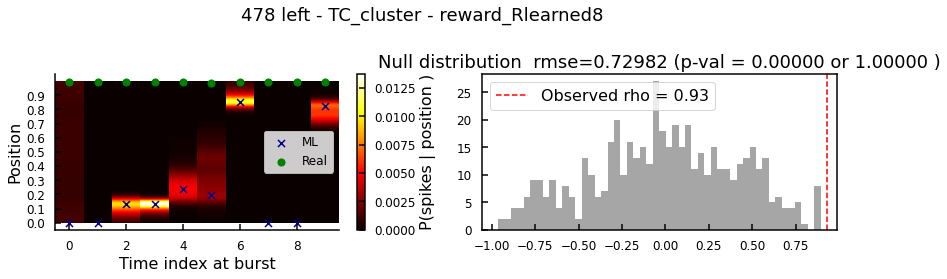

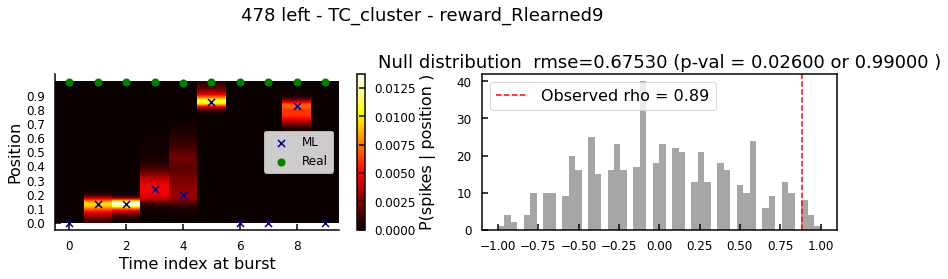

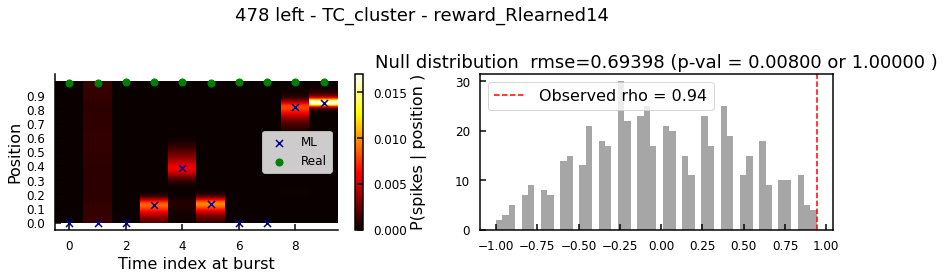

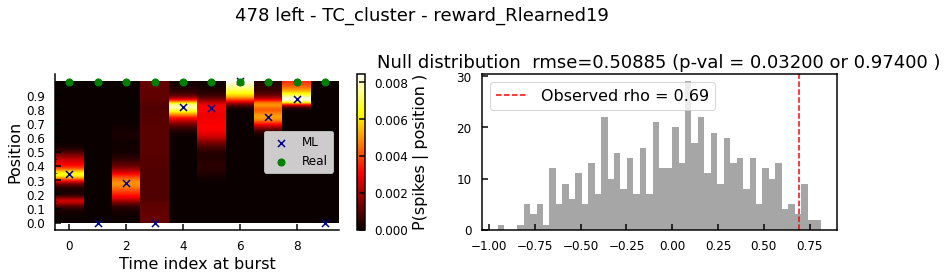

C:\Users\hamed\AppData\Local\Temp\ipykernel_10616\2801355539.py:172: RuntimeWarning: invalid value encountered in long_scalars
  sig_ratio = np.sum((np.asarray(pvals_1n) < .025) | (np.asarray(pvals_1n_neg) < .025)) / len(burst_cluster_type_cond)


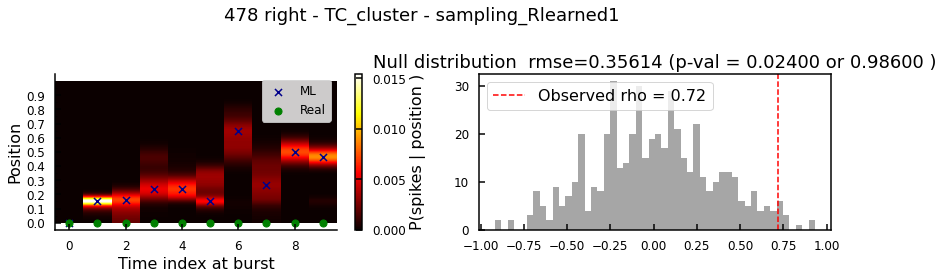

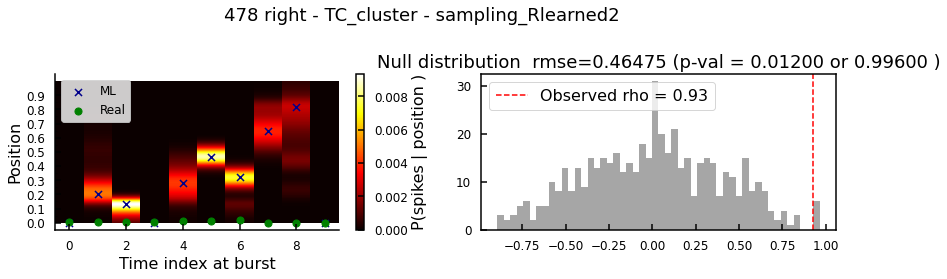

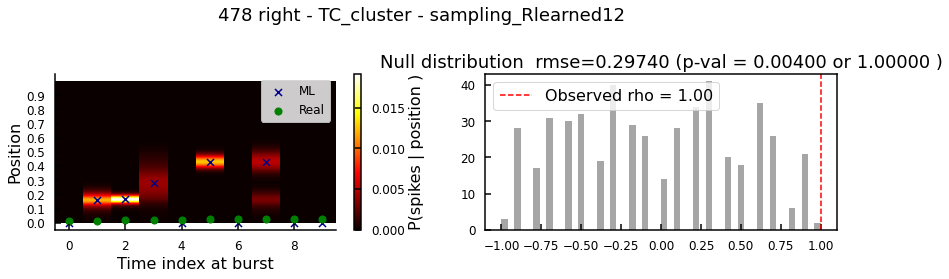

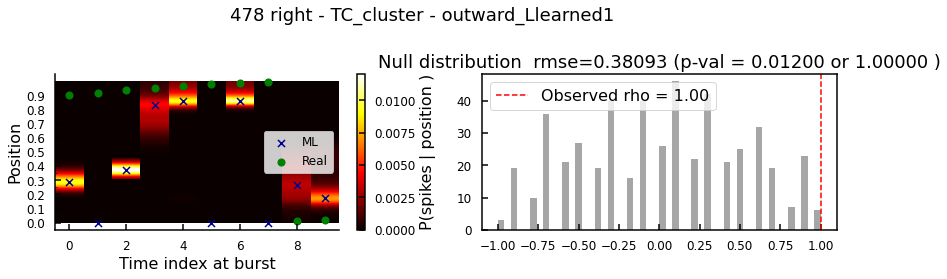

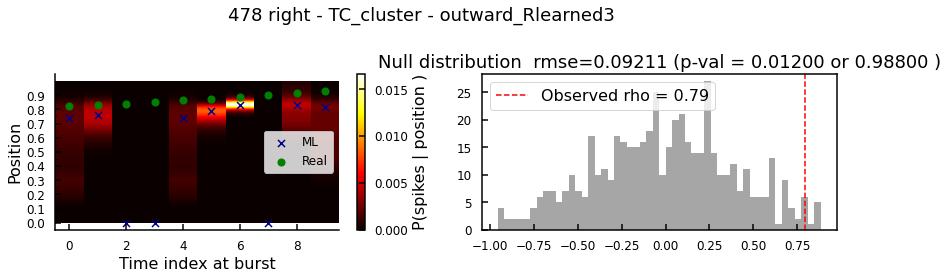

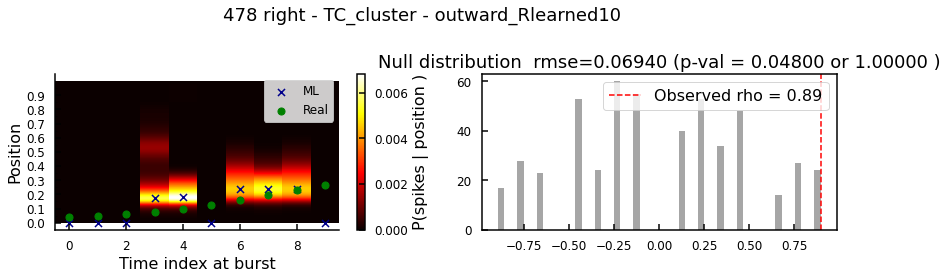

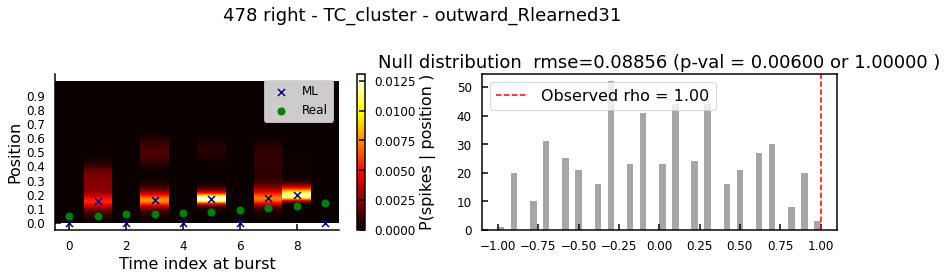

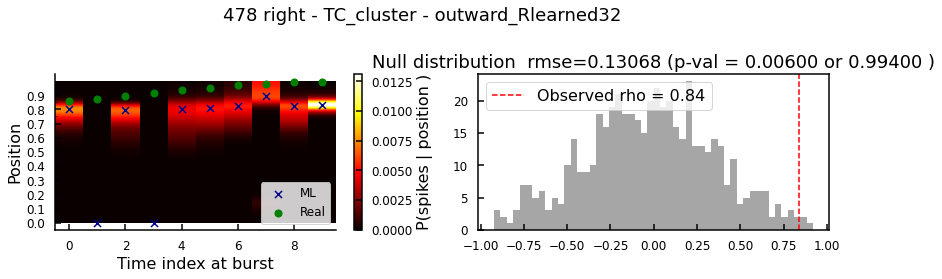

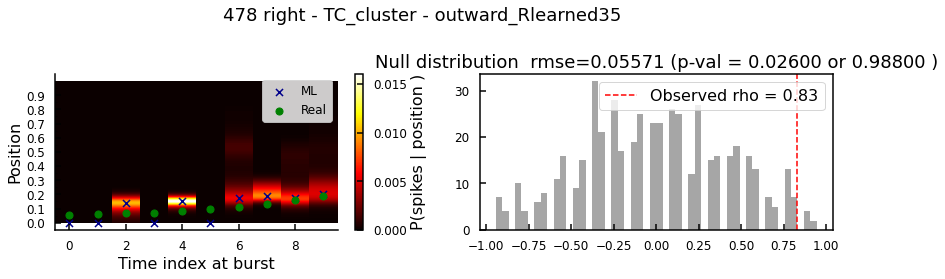

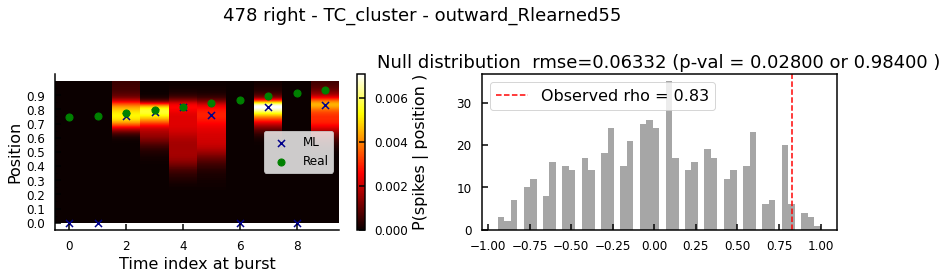

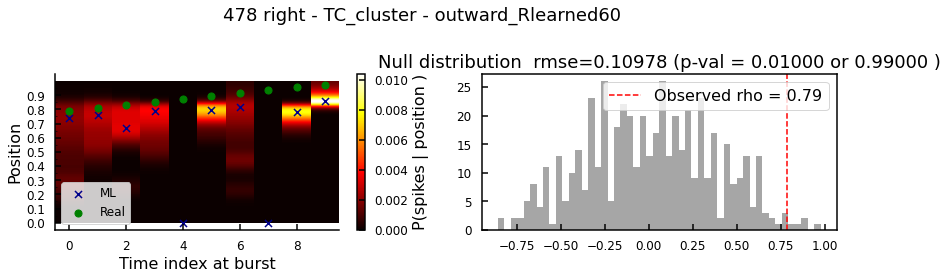

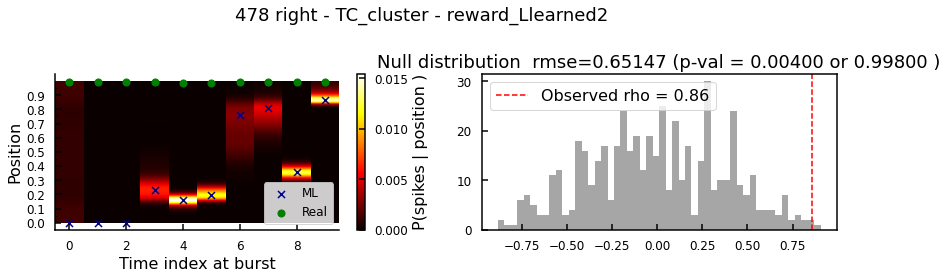

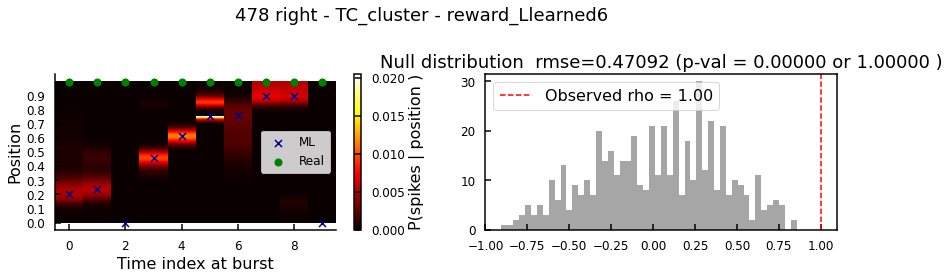

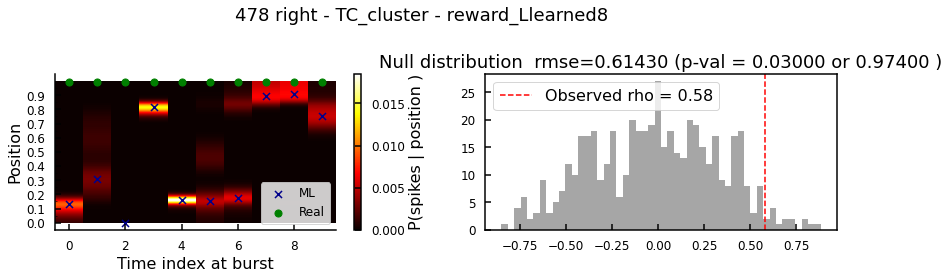

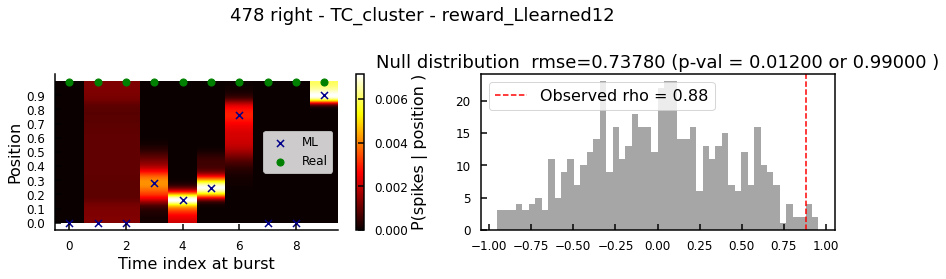

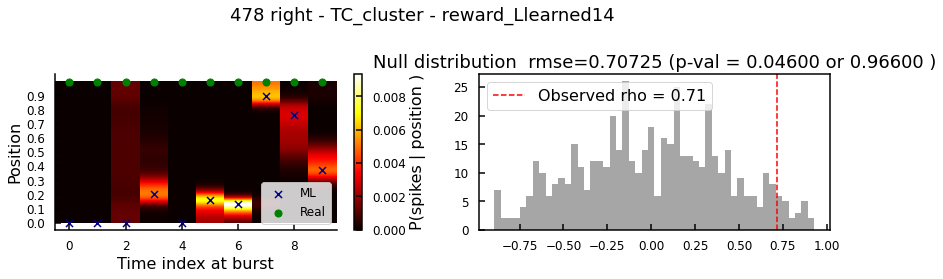

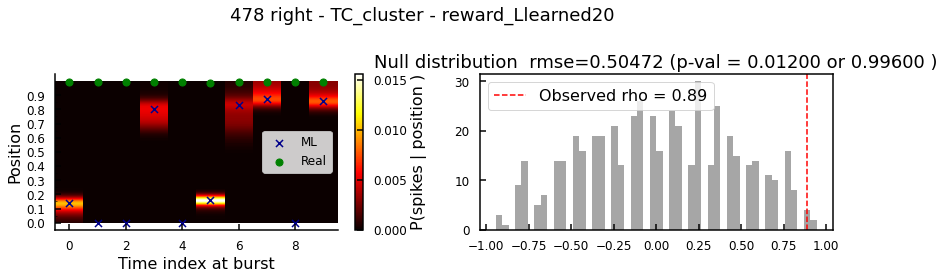

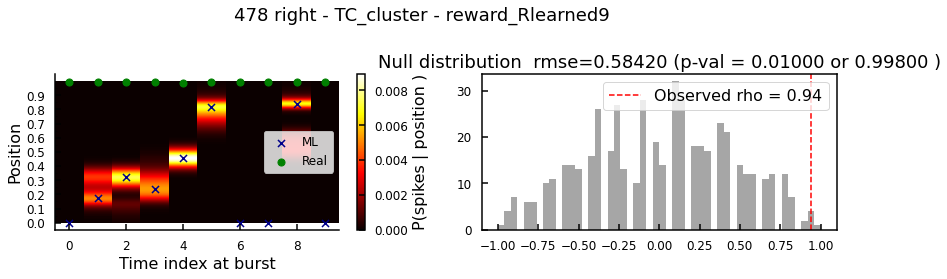

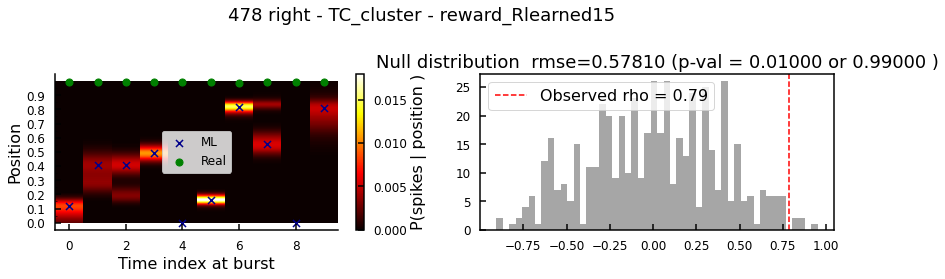

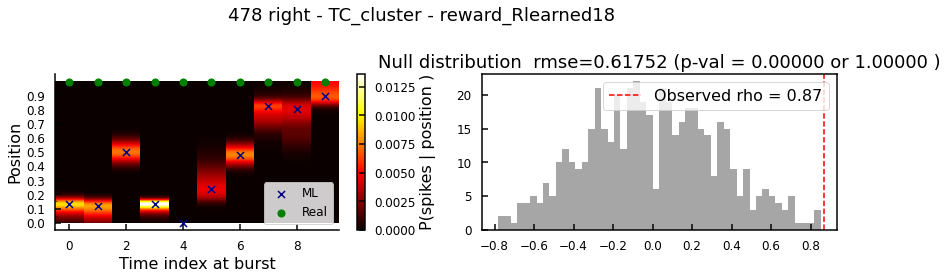

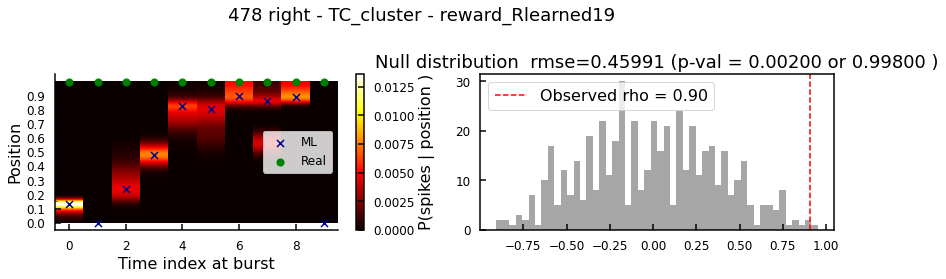

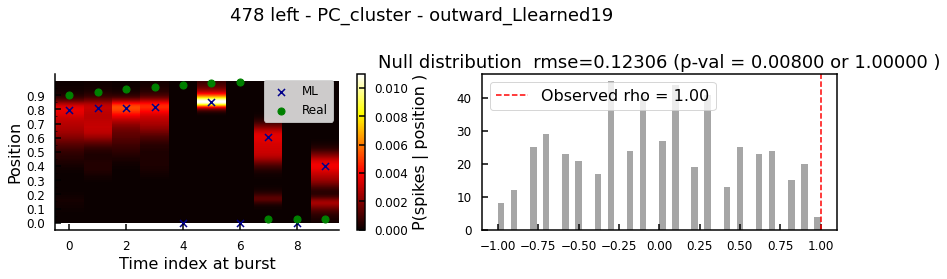

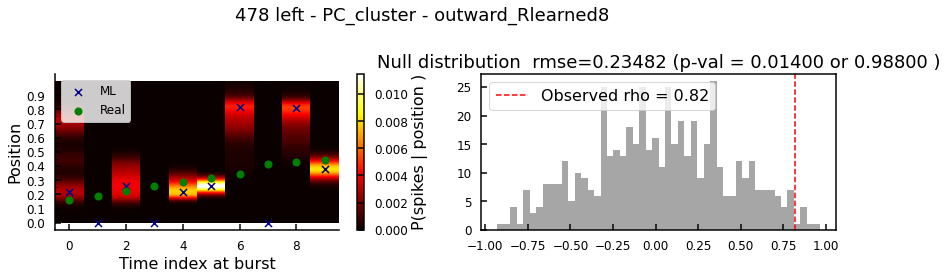

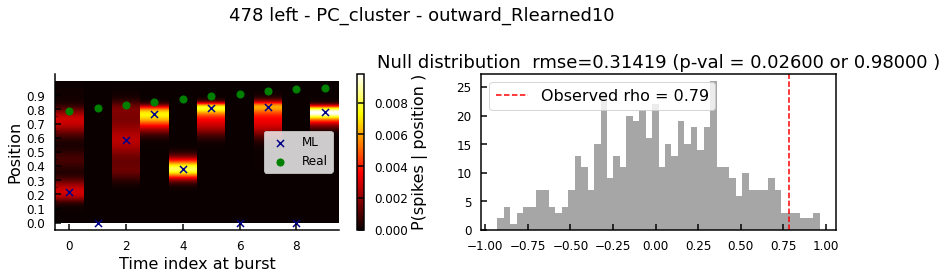

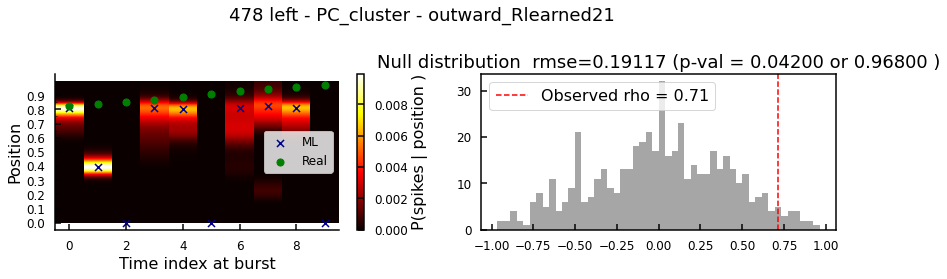

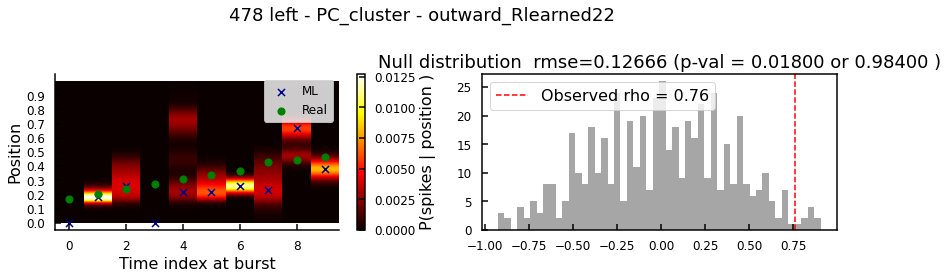

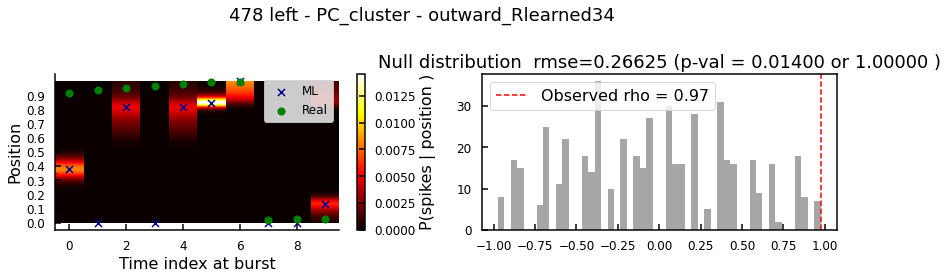

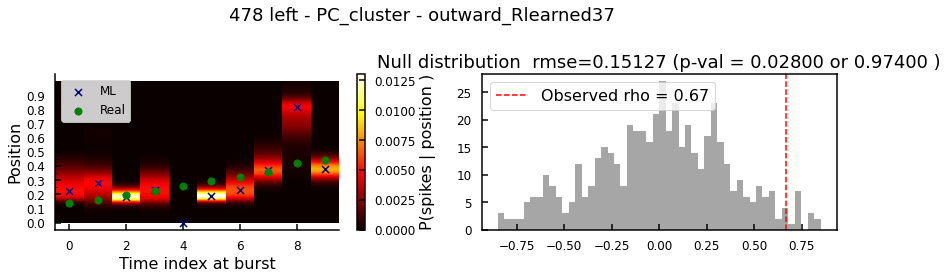

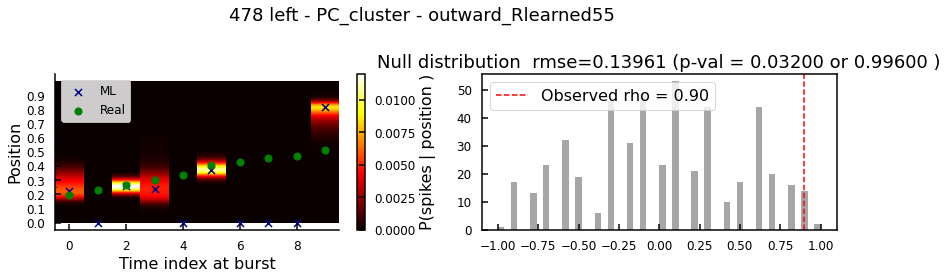

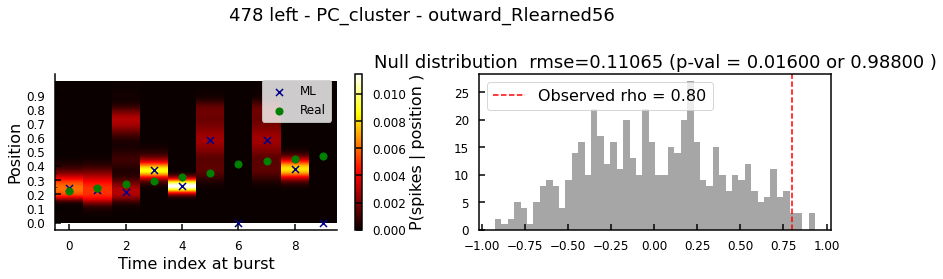

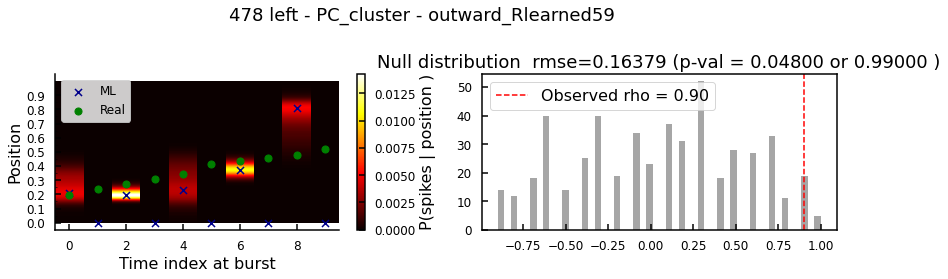

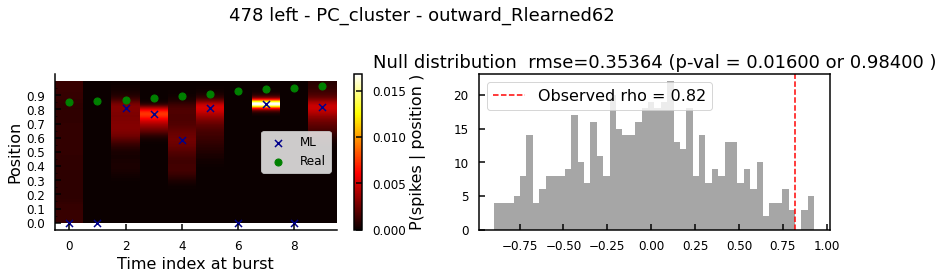

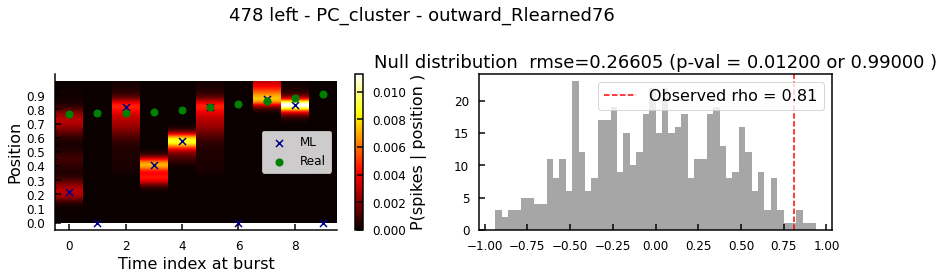

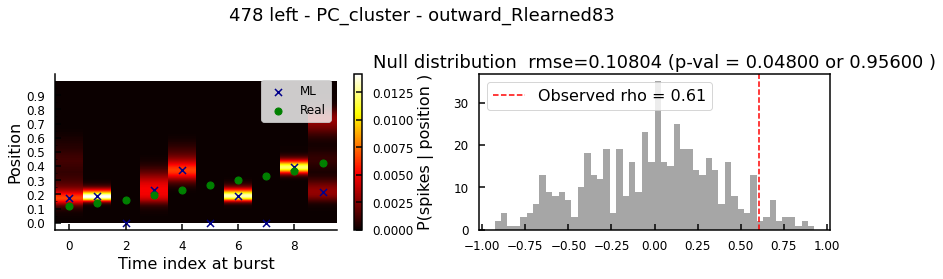

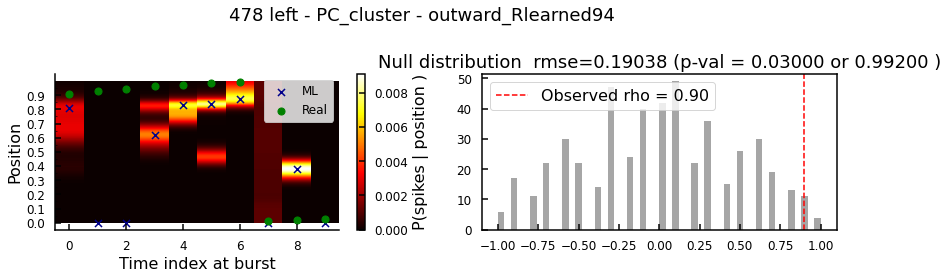

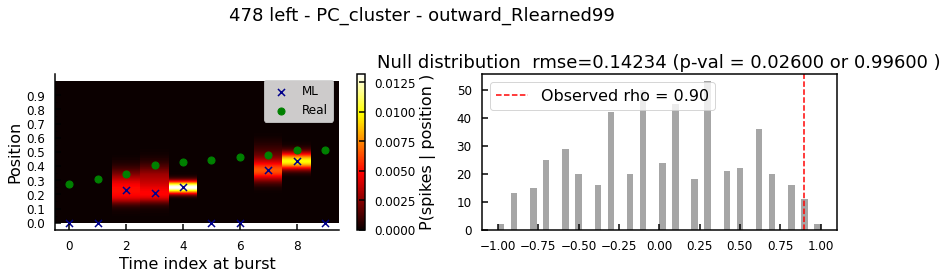

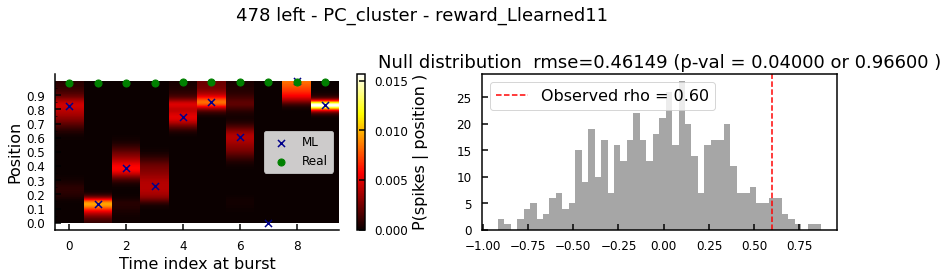

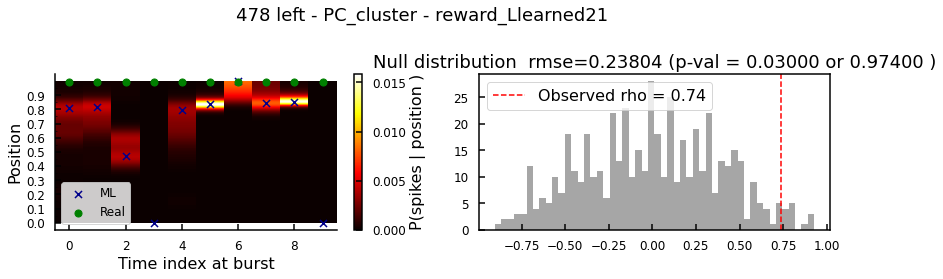

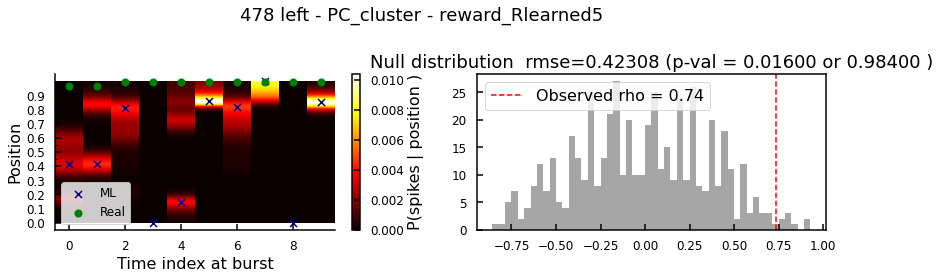

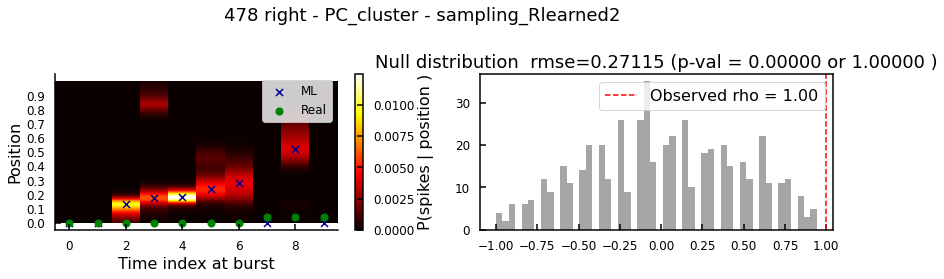

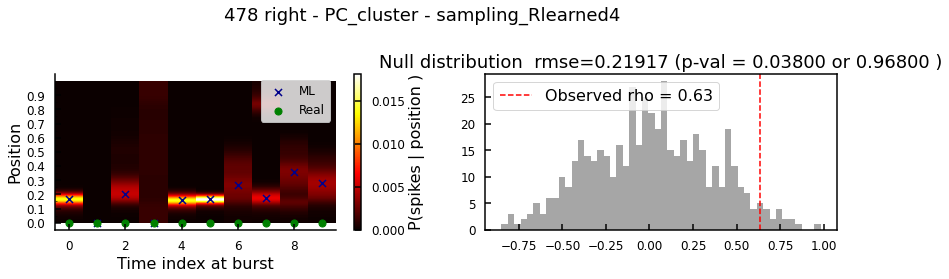

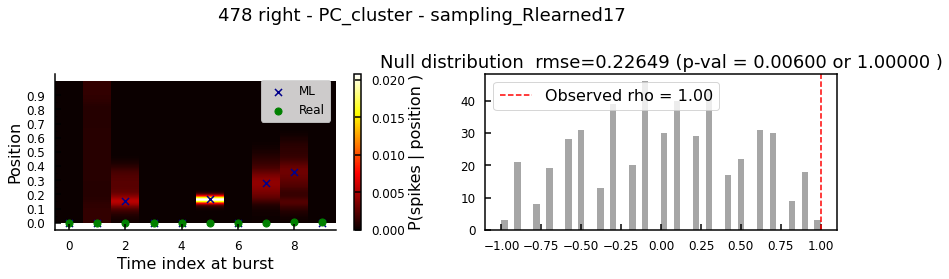

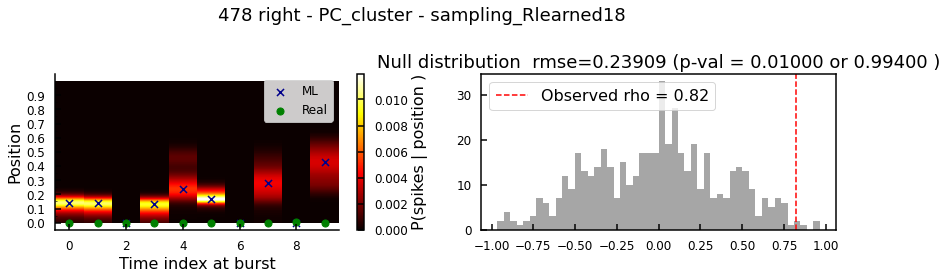

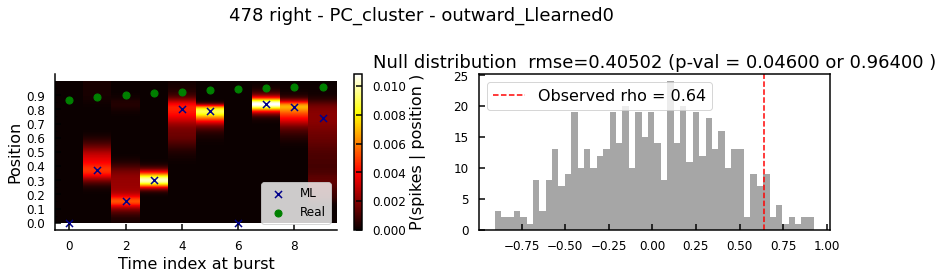

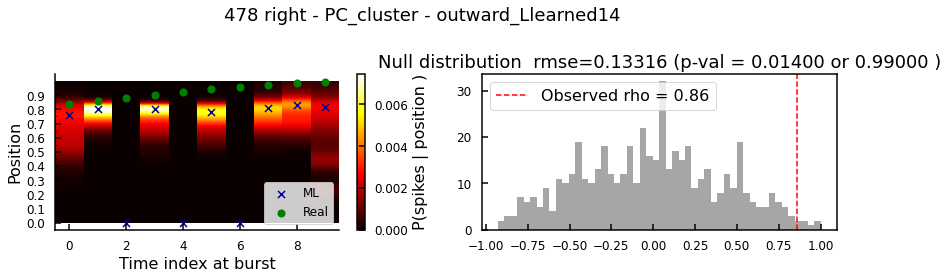

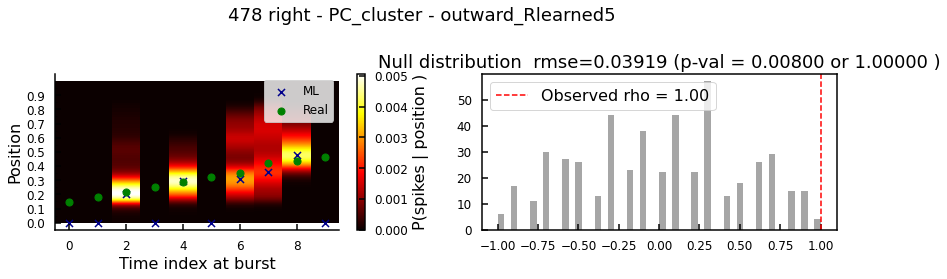

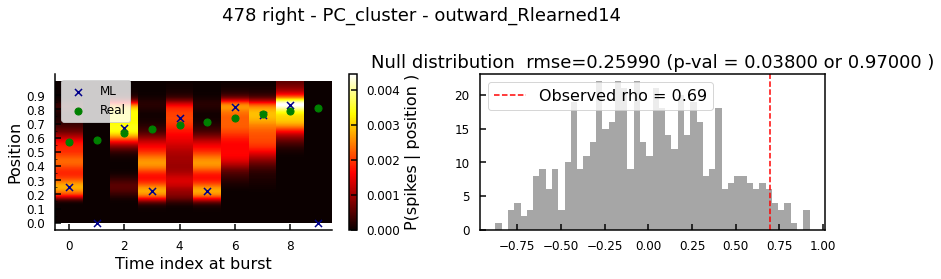

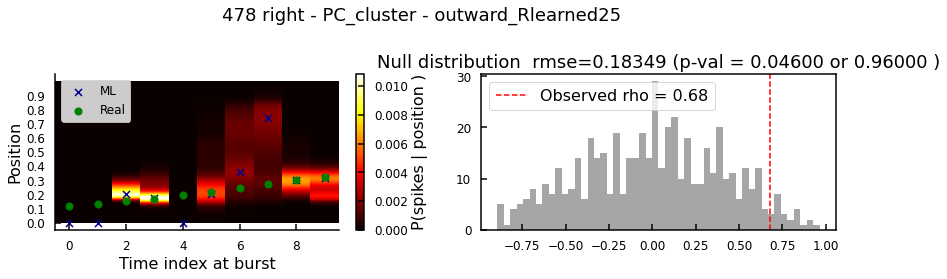

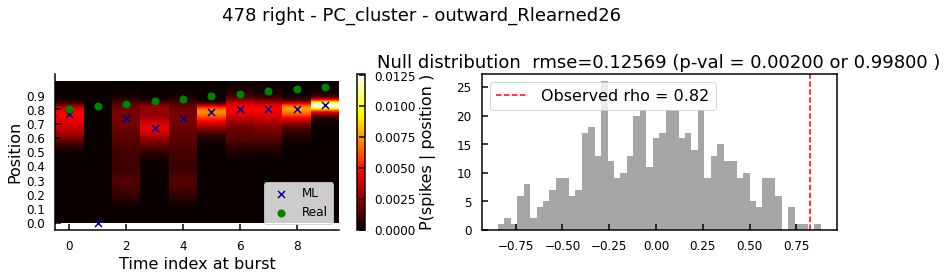

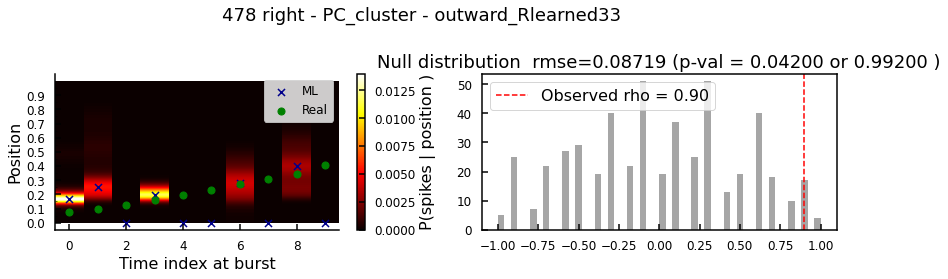

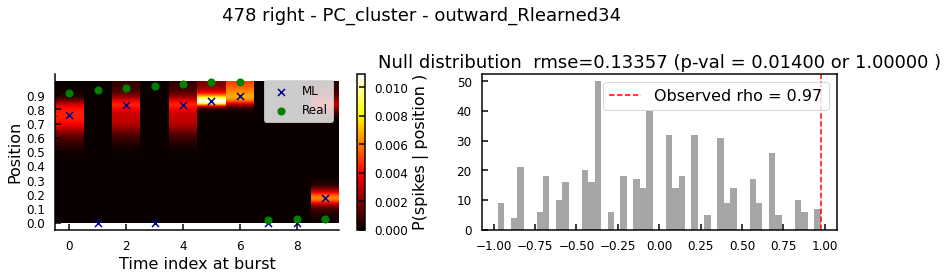

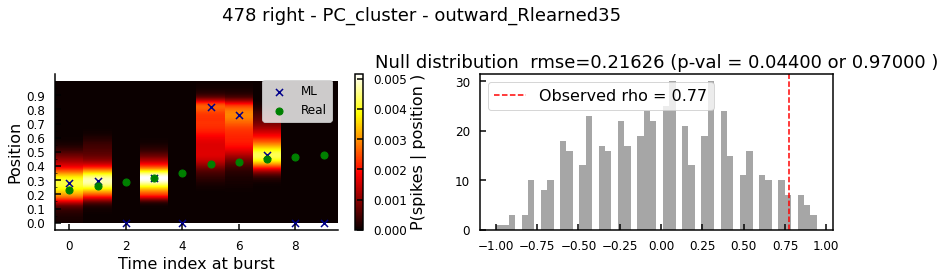

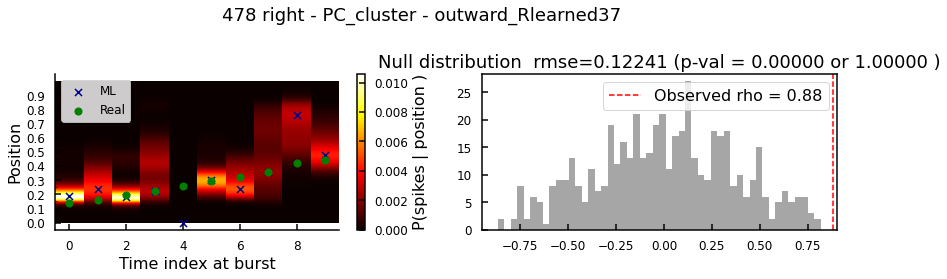

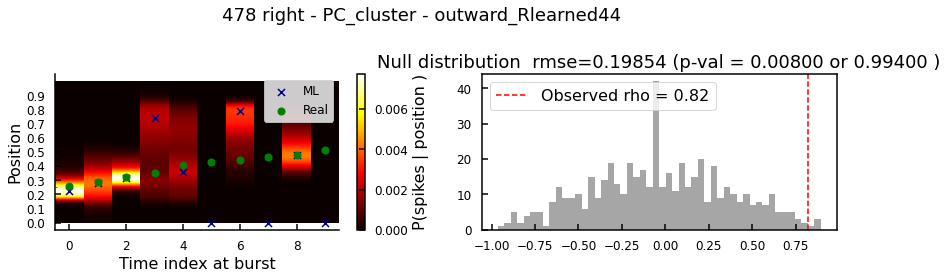

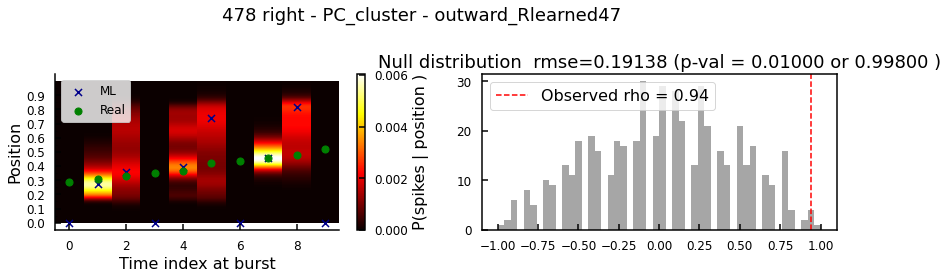

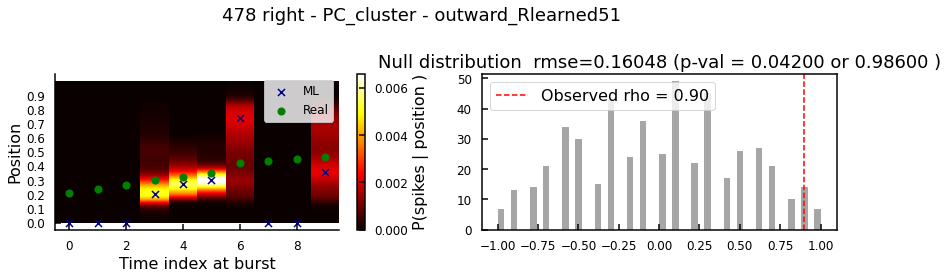

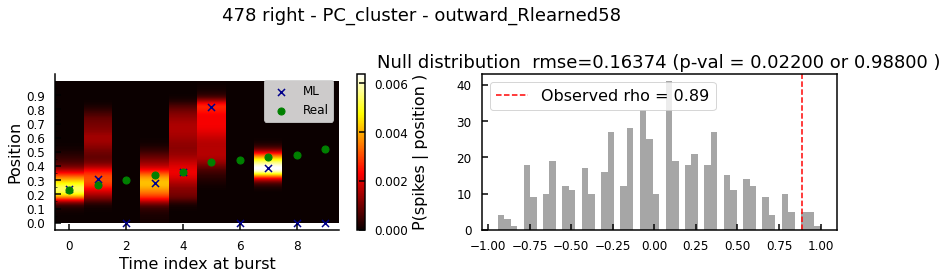

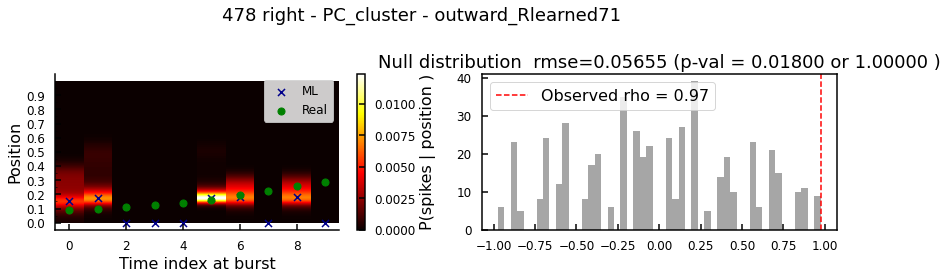

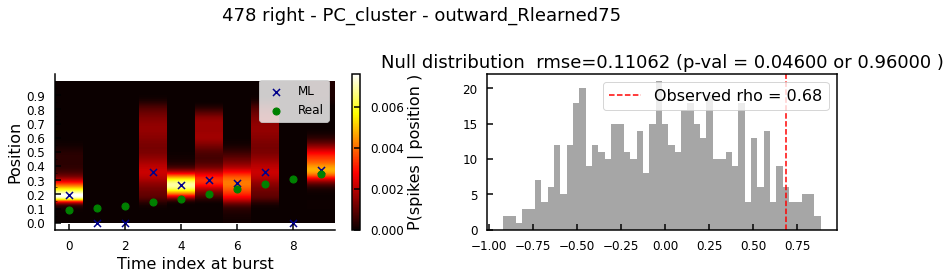

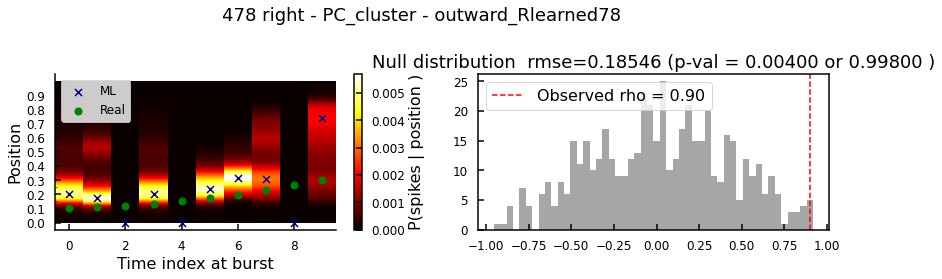

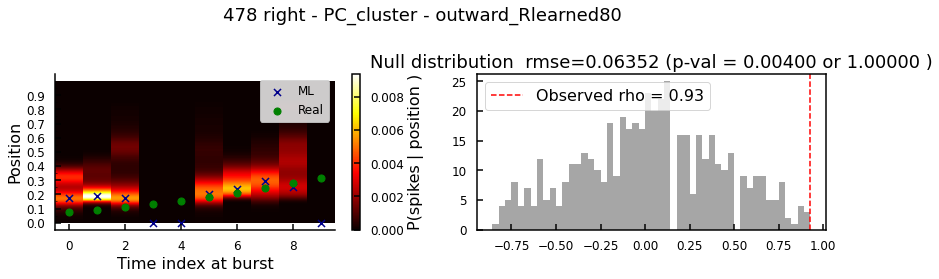

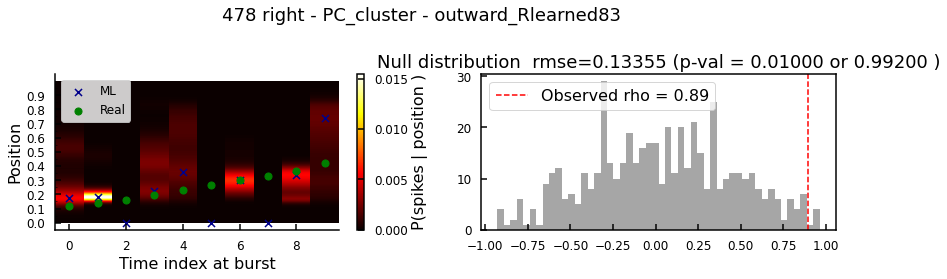

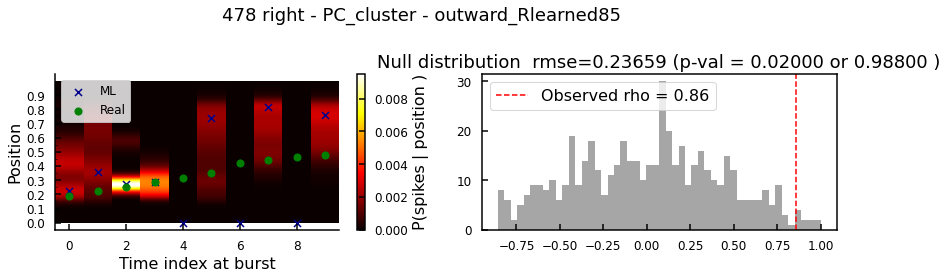

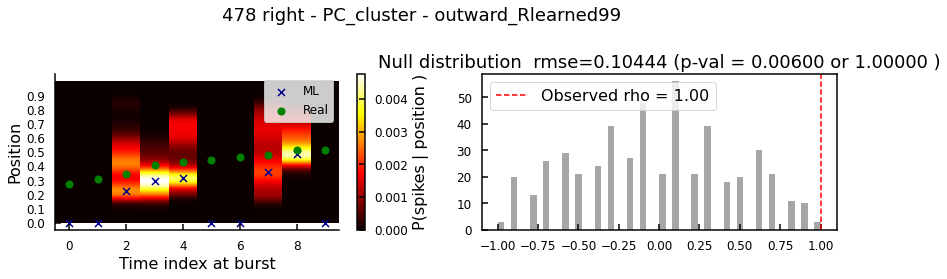

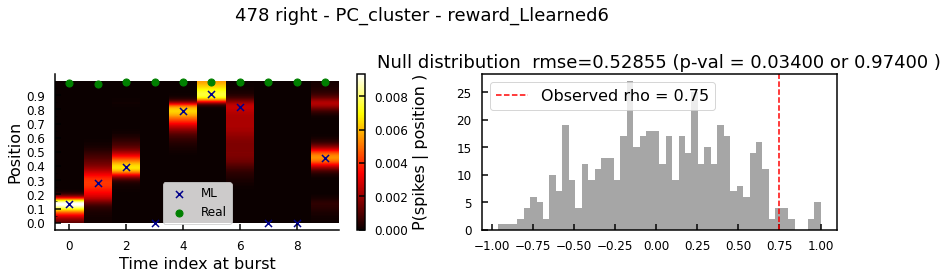

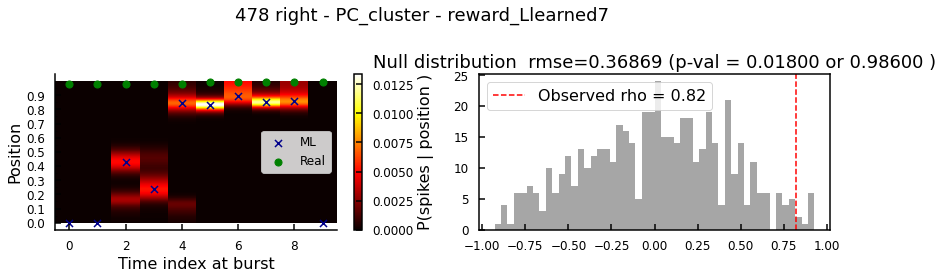

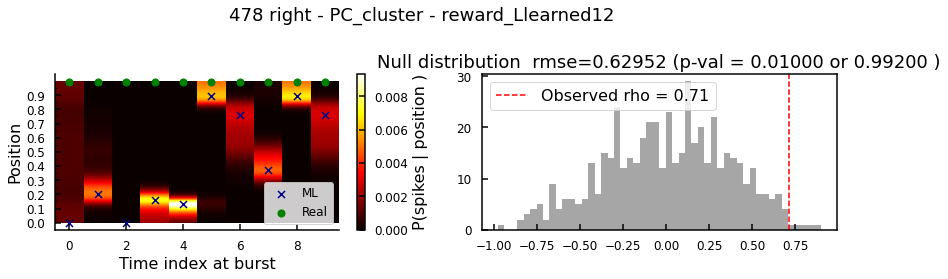

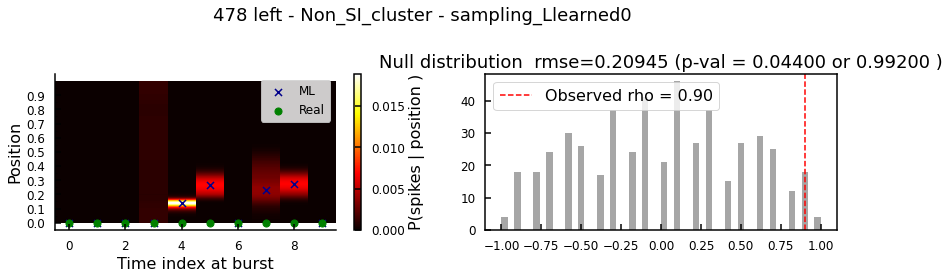

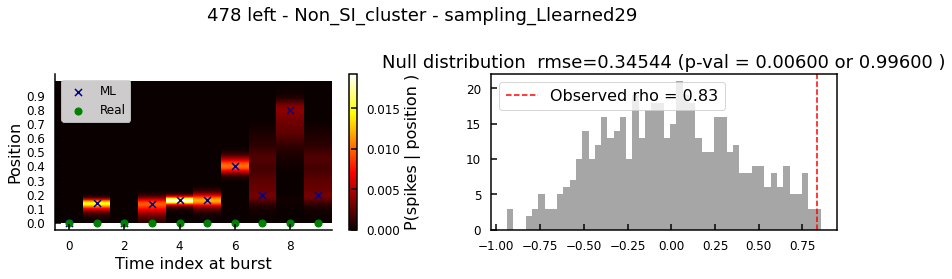

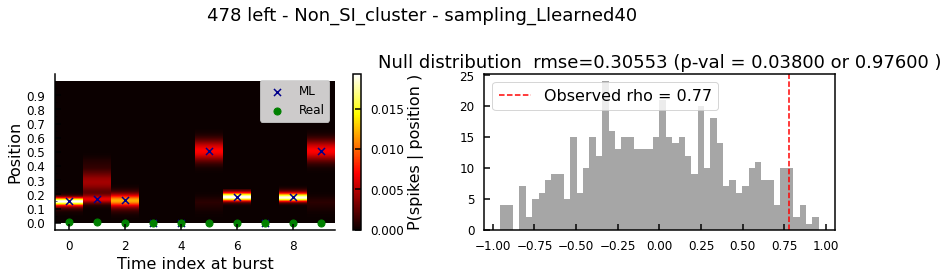

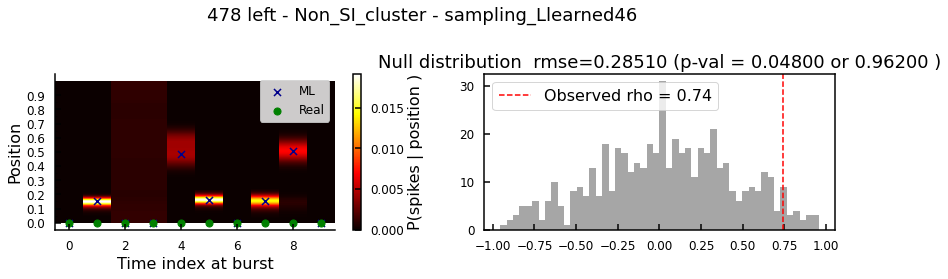

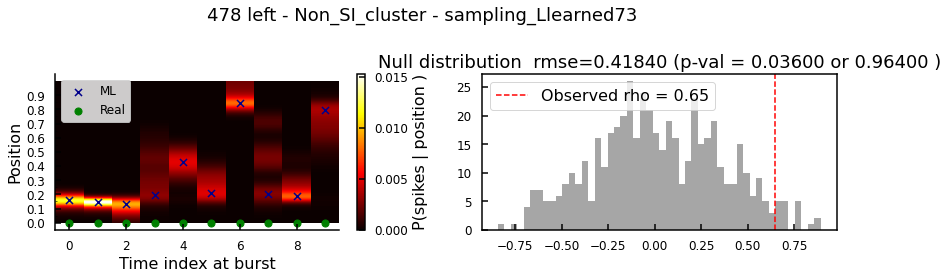

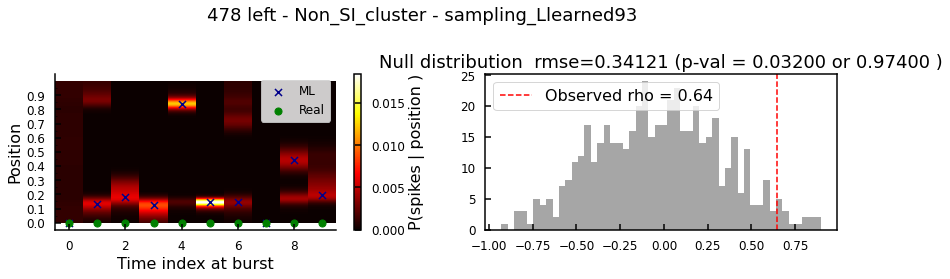

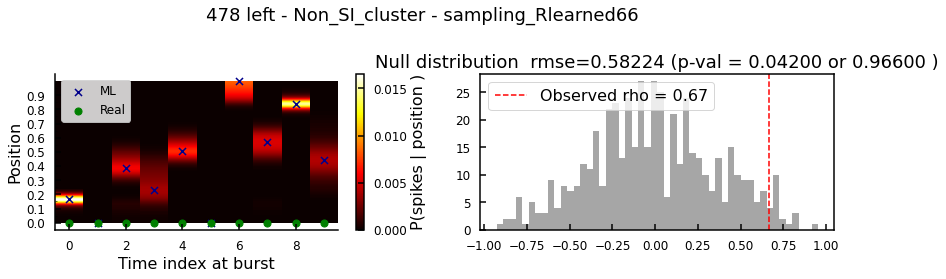

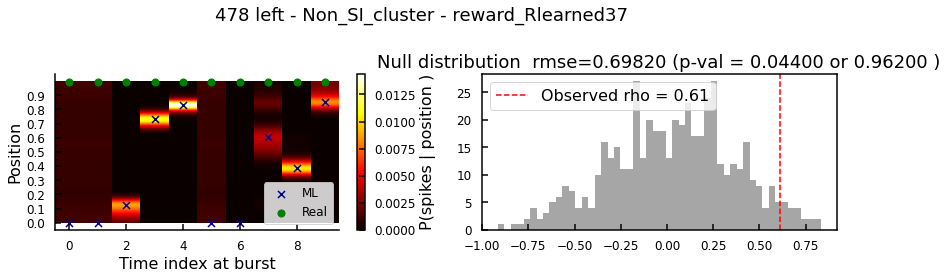

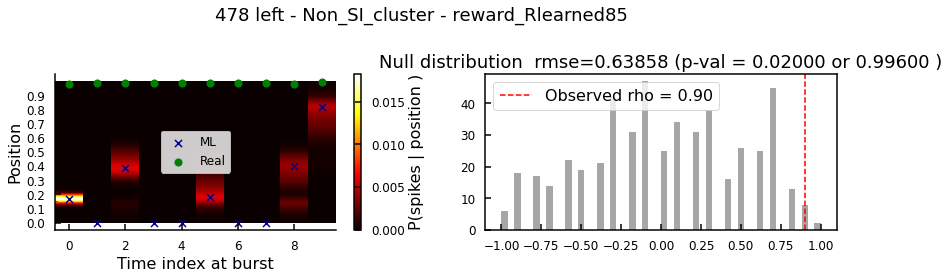

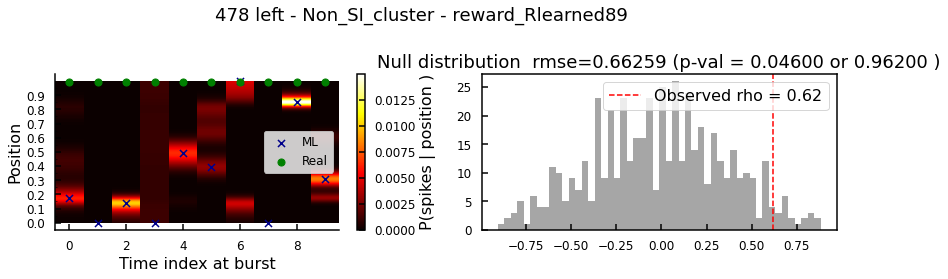

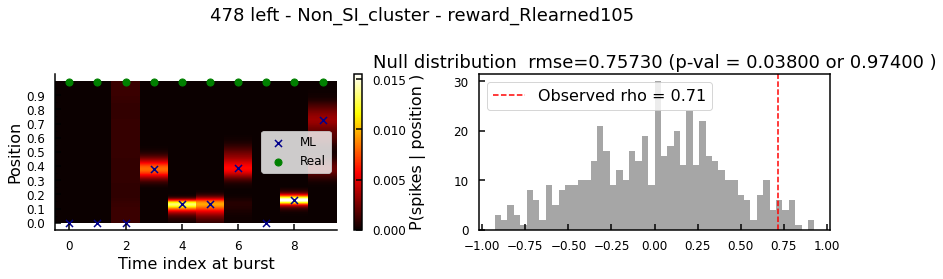

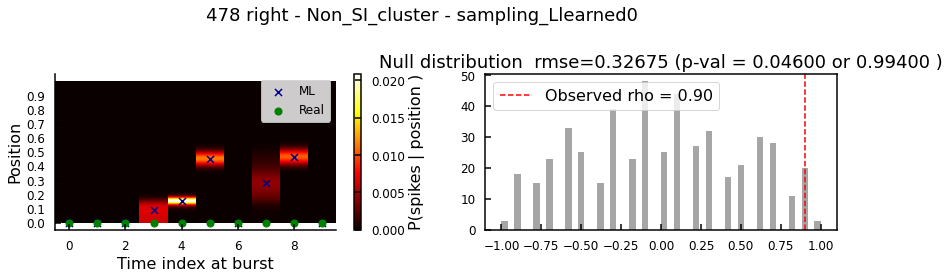

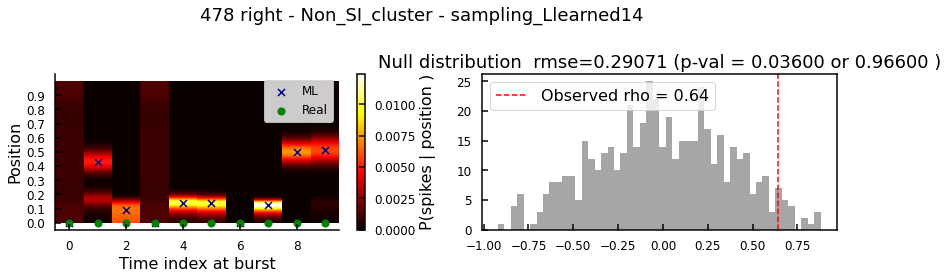

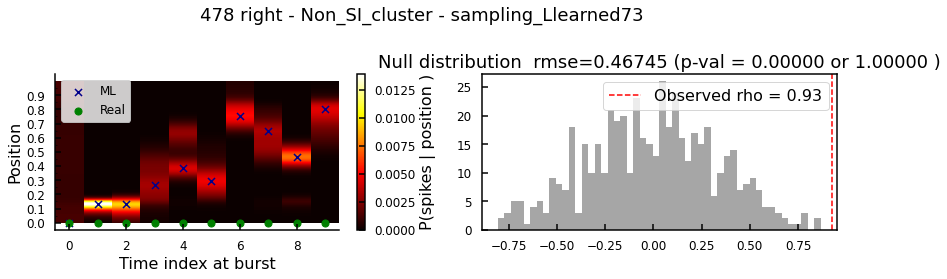

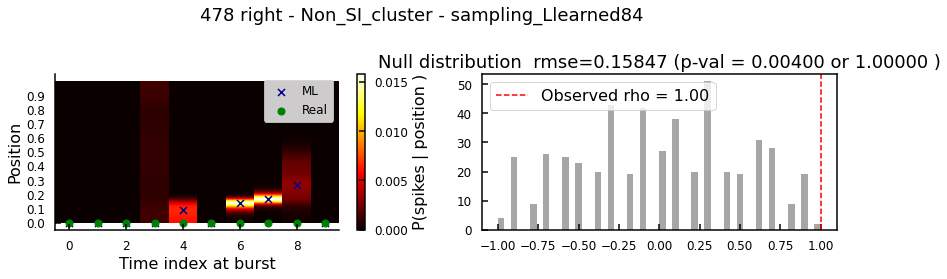

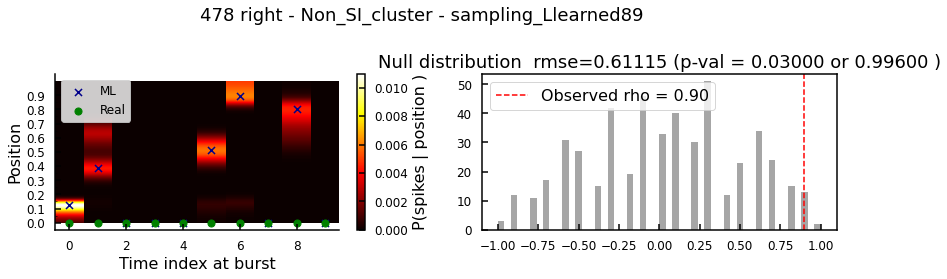

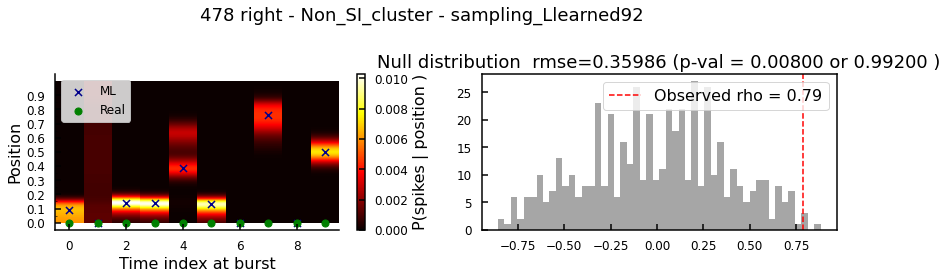

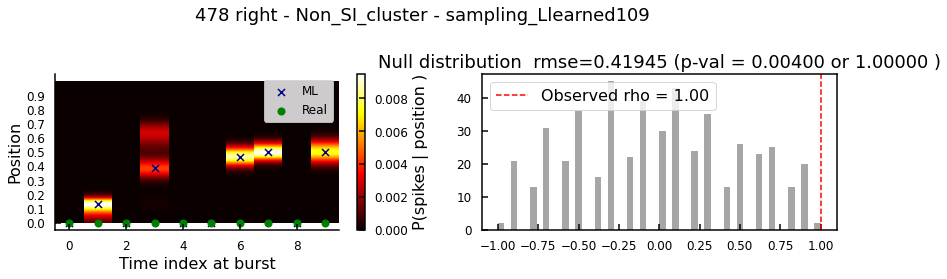

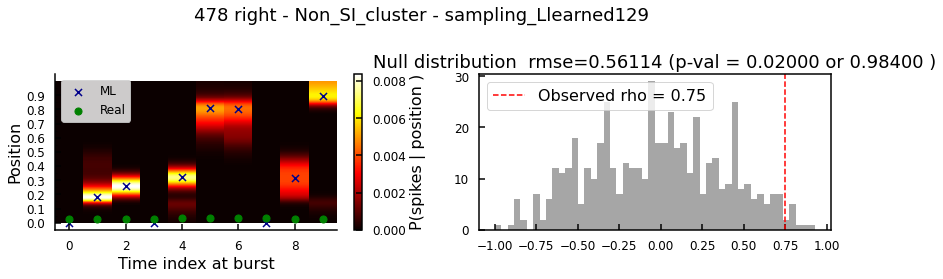

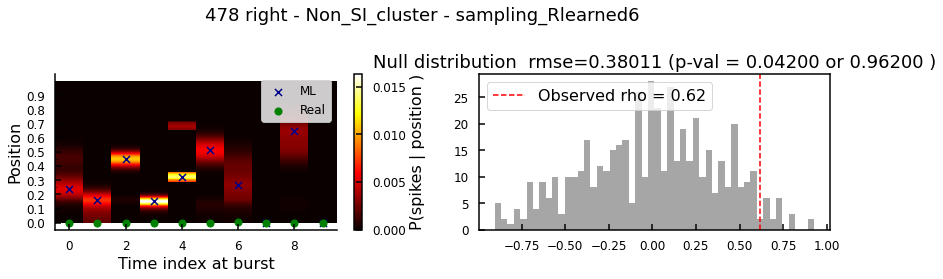

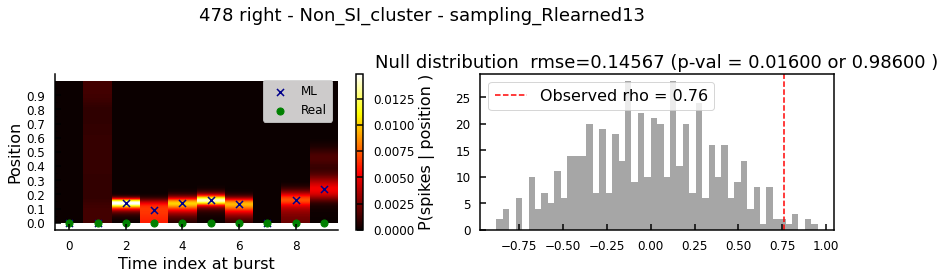

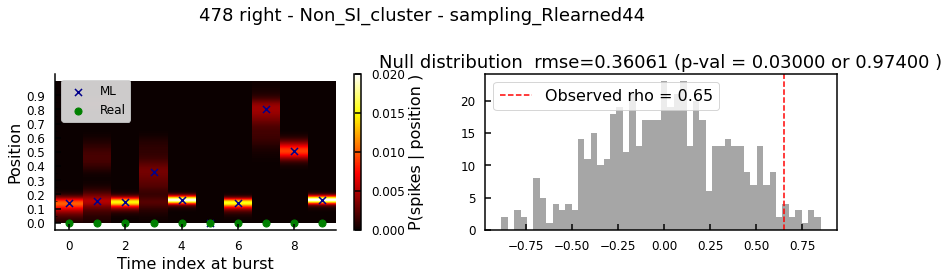

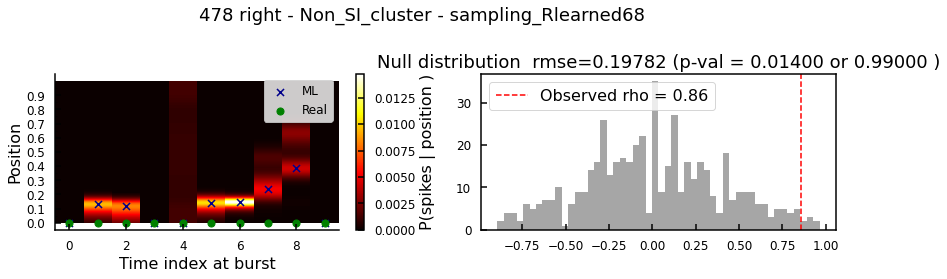

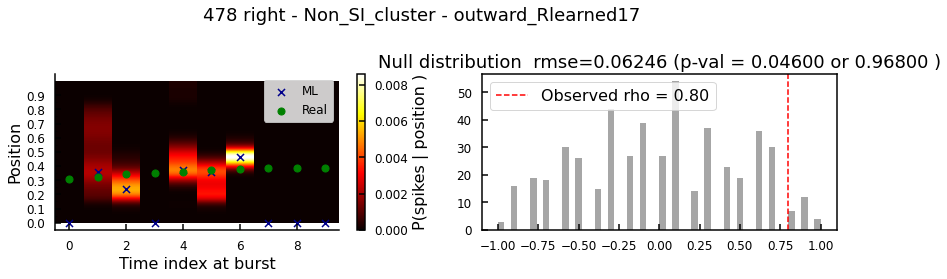

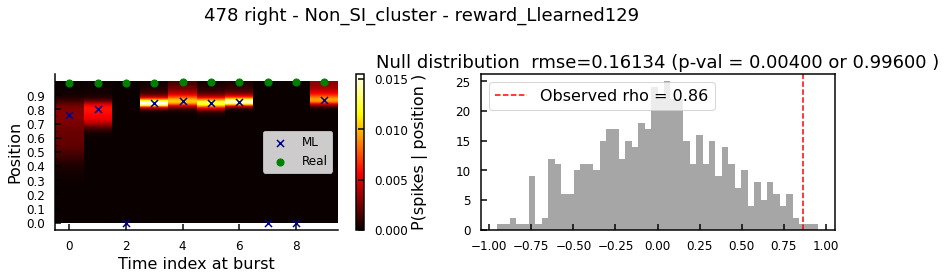

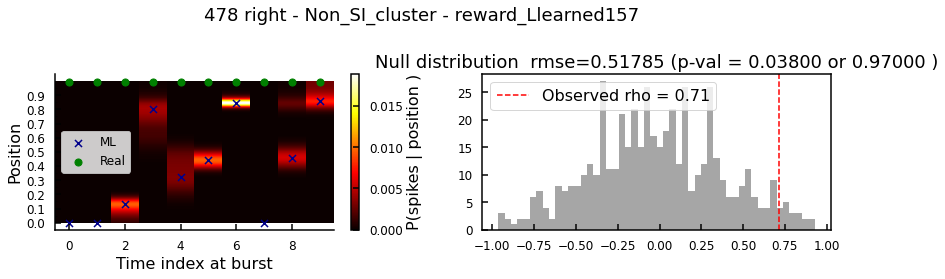

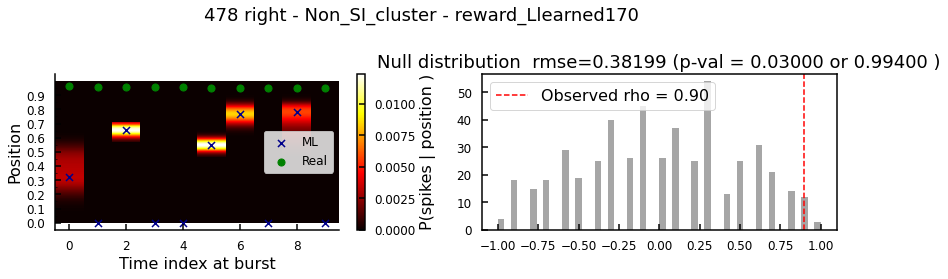

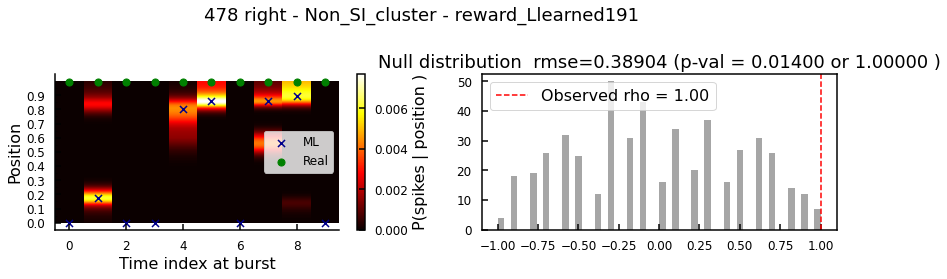

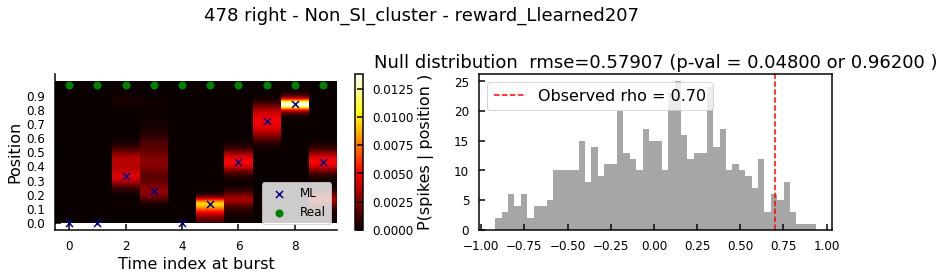

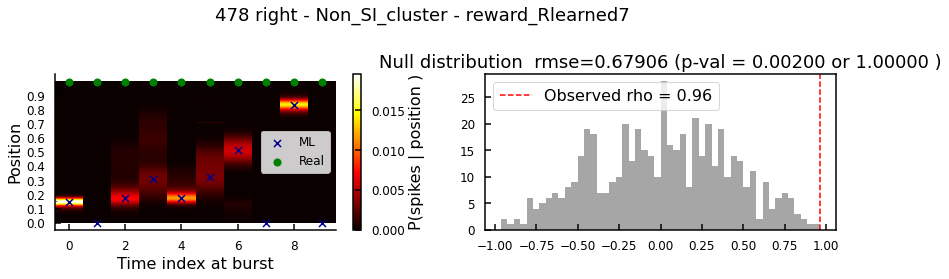

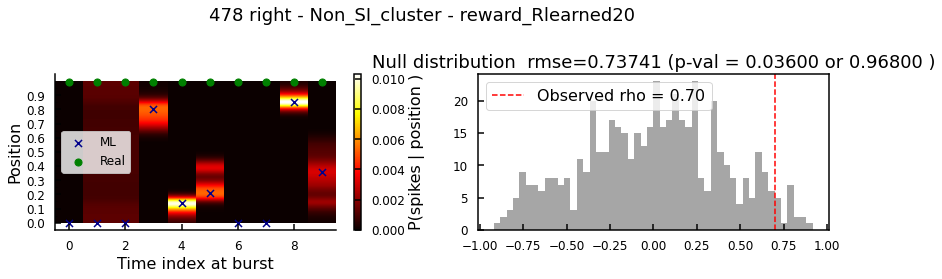

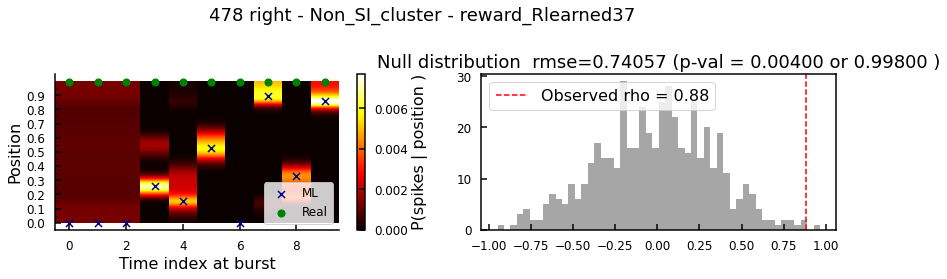

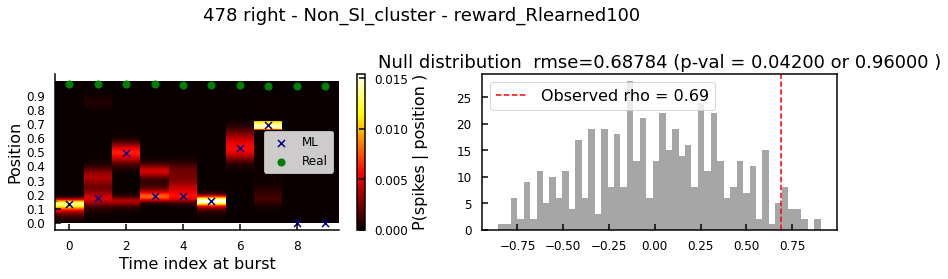

In [77]:
# Initialize the result dictionary for left and right separately
sig_ratios = {cell_type: {'left': {}, 'right': {}} for cell_type in cluster_types}
# List of condition groups to filter
#conditions_to_filter = ['reward',]
# Dictionary to map sides to outward conditions
cond_sides = {
    'left': cond_names['outward_L'],
    'right': cond_names['outward_R']
}
artifact_thr = .3
# Loop through each cell type
for cluster_type_name in cluster_types.keys():
    # Loop through left and right conditions
    for side, outward_cond in cond_sides.items():
        # Loop through all behavioral conditions (sampling, reward, outward)
        for condition,cond in cond_names.items():
            # Get the left or right condition for the current behavioral state
            cnd_name=condition
            #cond = cond_names[cnd_name]
            #print(str(outward_cond)+'       '+str(cond))
            # Create the burst condition mask using all conditions
            burst_cond_mask = (data['mask_cond_fr'] == cond)
            burst_idx_cond = burst_tidxs[burst_cond_mask]
            cluster_idx_cond = data['ids_clust'][burst_cond_mask]
            cluster_type_mask = np.isin(cluster_idx_cond, cluster_types[cluster_type_name])
            burst_cluster_type_cond = burst_idx_cond[cluster_type_mask]
            #print(condition)
            # Store in the dictionary
            #sig_ratios[cluster_type_name][side][condition] = burst_cluster_type_cond

            # Process outward_single_cell and r_all_type for each neuron using only outward condition
            outward_single_cell = []
            #r_all_type = []
            #for inrn in range(len(neuron_tspidx)):
                # Only filter neurons based on the outward condition
                #outward_single_cell.append(neuron_tspidx[inrn][data['mask_cond_fr_cells'][inrn] == outward_cond])
               # outward_single_cell.append(neuron_tspidx[inrn])

                #r_all_type.append(r_all[inrn])

            # Optional: Store outward_single_cell and r_all_type if needed
            # Convert r_all_type to a NumPy array
            r_all_type = np.asarray(r_all_outward[side])

            # Space-time correlation parameters
            
            include_peak_neighs2 = 0
            
            pvals_1n = []
            pvals_1n_neg=[]
            z_bursts=[]
            Rmse=[]
            # Loop through all burst events
            for iburst_i, burst_i in enumerate(burst_cluster_type_cond):
                burst_tidx = burst_i
                frame_idxs = np.arange(burst_tidx - int(np.floor(burstsize / 2)), burst_tidx + int(np.ceil(burstsize / 2)))

                all_L_norm = np.zeros((y_ax.shape[0], frame_idxs.shape[0]))
                for i in range(len(frame_idxs)):
                    spk_cnt=cound_spik_in_burst(frame_idxs[i],r_all_type,neuron_tspidx)
                    if np.sum(spk_cnt)<1:
                    #print('boz')
                        continue
                        
                    _, all_L_norm[:, i] = pf.decode_neighbins(frame_idxs[i], y_ax, r_all_type, neuron_tspidx, dt=dt, num_neigh=include_peak_neighs2)
                non_zero_columns = np.where(~(all_L_norm == 0).all(axis=0))[0]
                all_L_norm_org=all_L_norm
                all_L_norm = all_L_norm[:, ~(all_L_norm == 0).all(axis=0)]

                if len (all_L_norm)==0:
                    continue
                #print('shape:',np.shape(all_L_norm))
                y_real = y[frame_idxs[non_zero_columns]]
                y_real_org = y[frame_idxs]

                if 'outward' in condition : # if burst is on the edge of maze
                    # Identify the first point where the change exceeds the threshold

                    # Find the differences between consecutive elements
                    diff = np.abs(np.diff(y_real))
                    sudden_change_index = np.where(diff > artifact_thr)[0]

                    # Keep only points before the sudden change
                    if len(sudden_change_index) > 0:
                        y_real = y_real[:sudden_change_index[0] + 1]
                        all_L_norm = all_L_norm[:, :sudden_change_index[0] + 1]


                if np.shape(all_L_norm)[1]<5:# exclude bursts hta have less than 5 active bins
                    continue

                t_ax = np.arange(np.shape(all_L_norm)[1])
                t_ax_org = np.arange(np.shape(all_L_norm_org)[1])

                yidx_max = np.nanargmax(all_L_norm, axis=0)
                yidx_max_org = np.nanargmax(all_L_norm_org, axis=0)

                # if np.max(frame_idxs) >= len(y):
                #     continue
                

                
                # if abs(np.sum(np.diff(y_real))) > artifact_thr:
                #     continue

                # if np.sum(yidx_max == bias_idx_cell_types[side]) > 0:
                #     continue

                y_ML = y_ax[yidx_max]
                y_ML_org = y_ax[yidx_max_org]

                # if np.sum(y_ML) == 0:
                #     continue
                rmse = np.sqrt(np.mean((y_real - y_ML) ** 2))
                Rmse.append(rmse)
                # Spearman correlation between predicted and real positions
                rho, _ = spearmanr(y_ML, t_ax)
                #rho, _ = pearsonr(y_ML, t_ax)
                #print(rho)
                # if np.isnan(rho):
                #     continue
                
                # Generate a null distribution of correlations
                null_rhos = np.zeros(Nshuffles)
                for shui in range(Nshuffles):
                    ranvec = np.random.permutation(t_ax.shape[0])
                    null_rhos[shui], _ = spearmanr(y_ML, t_ax[ranvec])
                    #null_rhos[shui], _ = pearsonr(y_ML, t_ax[ranvec])

                z= (rho-np.mean(null_rhos))/np.std(null_rhos)
                z_bursts.append(z)
                # Calculate p-value
                pval = 1 - np.mean((rho) > (null_rhos))
                pval_neg = 1 - np.mean((rho) < (null_rhos))# include negative replays

                pvals_1n.append(pval)
                pvals_1n_neg.append(pval_neg)
                if pval <.05:#1:#((pval <.025) | (pval_neg < .025)) & ('outward' in condition):
                    # Plotting the heatmap and positions
                    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

                    # Heatmap of decoded positions
                    im = ax[0].pcolormesh(t_ax_org, y_ax, all_L_norm_org, cmap='hot', rasterized=True)
                    ax[0].scatter(t_ax_org, y_ML_org, c='#00008B', marker='x', s=50, label='ML')
                    ax[0].scatter(t_ax_org, y_real_org, c='g', marker='o', s=50, label='Real')
                    cbar = plt.colorbar(im, ax=ax[0])
                    cbar.ax.set_ylabel(r'P(spikes | position )')

                    ax[0].set_xlabel('Time index at burst', fontsize=16)
                    ax[0].set_ylabel('Position', fontsize=16)
                    ax[0].set_yticks(np.arange(0, 1, 0.1))
                    ax[0].set_yticks(np.arange(0, 1, 0.05), minor=True)
                    ax[0].set_ylim([-.05,1.05])
                    ax[0].legend(fontsize=12)

                    # Histogram of null distribution
                    ax[1].hist(null_rhos, bins=50, color='gray', alpha=0.7)
                    ax[1].axvline(rho, color='red', linestyle='--', label=f'Observed rho = {rho:.2f}')
                    ax[1].set_title(f'Null distribution  rmse={rmse:.5f} (p-val = {pval:.5f} or {pval_neg:.5f} )')
                    ax[1].legend()

                    plt.suptitle(f'{filename[:3]} {side} - {cluster_type_name} - {cnd_name}{phase}'+str(iburst_i), fontsize=18)
                    hide_spines(ax=ax[0])
                    fig.tight_layout()
                    plt.savefig(savefolder+'Replayfull'+side+f'{filename[:3]}{cluster_type_name}{cnd_name}{phase} burstid={iburst_i}.svg')
                    plt.show()

            # Calculate significant burst ratio
            #sig_ratio = np.sum(np.asarray(pvals_1n) < .05) / len(burst_cluster_type_cond)


            sig_ratio = np.sum((np.asarray(pvals_1n) < .025) | (np.asarray(pvals_1n_neg) < .025)) / len(burst_cluster_type_cond)

            
            significant_bursts = {
                'pvals_pos': pvals_1n,
                'pvals_neg':pvals_1n_neg,
                'sig_burst_ratio': sig_ratio,
                'name': f'{filename[:3]} - {cluster_type_name} - {cnd_name}',
                'Z':z_bursts,
                'rmse':Rmse
            }

            # Store the result in the dictionary
            sig_ratios[cluster_type_name][side][condition] = significant_bursts
            significant_bursts_name = 'Replay' + filename[:3] + phase


# with open(savefolder+significant_bursts_name, 'wb') as file:
#     pickle.dump(sig_ratios, file)